In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data

In [3]:
Qcc_sq = pd.read_csv('Qcc_sq.csv')

In [4]:
QCC_co = pd.read_csv('QCC_co.csv')

In [5]:
QCC_cc = pd.read_csv('QCC_cc.csv')

In [6]:
Qcc_quant = pd.read_csv('Qcc_quant.csv')
Qcc_quant

Project                                Domain     NOP      TLOC  LCOM_01  \
0    ant-1.8               parsers/generators/make   127.0  127559.0      0.0   
1    antlr-3               parsers/generators/make    20.0   47443.0      0.0   
2    aoi-2.8                     3D/graphics/media    23.0  110009.0      0.0   
3    argouml  diagram generator/data visualization    77.0  105806.0      0.0   
4    aspectj                  programming language   144.0  501762.0      0.0   
5    axion-1                              database    13.0   24163.0      0.0   
6    azureus                              database   473.0  495532.0      0.0   
7    batik-1                     3D/graphics/media   117.0  194715.0      0.0   
8    castor-                            middleware   381.0  219681.0      0.0   
9    cayenne                              database   235.0  198176.0      0.0   
10   checkst                                   IDE    42.0   36641.0      0.0   
11   cobertu                               testing    34.0   54555.0      0.0   
12   collect                                  tool    23.0   55398.0      0.0   
13   colt-1.                                   SDK    24.0   35919.0      0.0   
14   columba                                  tool   212.0   71905.0      0.0   
15   compier                                  tool    78.0  400516.0      0.0   
16   c_jdbc-                              database   145.0   95527.0      0.0   
17   derby-1                              database   217.0  651118.0      0.0   
18   display  diagram generator/data visualization    32.0   20498.0      0.0   
19   drawswf                     3D/graphics/media    34.0   27674.0      0.0   
20   drjava-                                   IDE    30.0   89477.0      0.0   
21   emma-2.                               testing    33.0   23109.0      0.0   
22   exoport  diagram generator/data visualization   413.0   96038.0      0.0   
23   findbug                               testing    67.0  110782.0      0.0   
24   fitjava                               testing     5.0    3457.0      0.0   
25   fitlibr                               testing   157.0   46588.0      0.0   
26   freecol                                 games    51.0  106412.0      0.0   
27   freecs-                                  tool    12.0   22645.0      0.0   
28   freemin  diagram generator/data visualization    45.0   52757.0      0.0   
29   galleon                     3D/graphics/media    35.0   61137.0      0.0   
30   ganttpr                                  tool    55.0   48615.0      0.0   
31   geotool                                   SDK   894.0  876486.0      0.0   
32   hadoop-                            middleware   238.0  319868.0      0.0   
33   heritri                                  tool    48.0   64916.0      0.0   
34   hiberna                              database   856.0  431693.0      0.0   
35   hsqldb-                              database    34.0  149722.0      0.0   
36   htmluni                               testing    43.0  100760.0      0.0   
37   informa                            middleware    26.0   13874.0      0.0   
38   iReport  diagram generator/data visualization   120.0  218032.0      0.0   
39   itext-5  diagram generator/data visualization    34.0   78348.0      0.0   
40   ivatagr                            middleware    94.0   24716.0      0.0   
41   jag-6.1                                  tool    18.0   15699.0      0.0   
42   james-2                                  tool    53.0   42767.0      0.0   
43   jasml-0                                  tool     5.0    5728.0      0.0   
44   jasperr  diagram generator/data visualization    61.0  169821.0      0.0   
45   javacc-               parsers/generators/make    12.0   18287.0      0.0   
46   jboss-5                            middleware  1170.0  524942.0      0.0   
47   jchempa                                   SDK   201.0  212803.0      0.0   
48   jedit-4                        

In [7]:
Qcc_quant.shape

(109, 172)

In [8]:
TD = pd.read_csv('TD.csv')
TD

Project  SonarQube_debt  Codiga_debt  CodeClimate_debt
0    ant-1.8     1431.033333       677.56            5595.5
1    antlr-3      934.400000       737.00            5701.4
2    aoi-2.8     1606.300000       702.66           10842.6
3    argouml     2277.266667       992.36           11998.6
4    aspectj     6653.583333      3144.50           67848.8
5    axion-1      320.850000       197.36            1562.4
6    azureus     5155.616667      2916.10           30520.2
7    batik-1     2999.200000      1436.56           12370.0
8    castor-    21213.083330      1155.66            5376.4
9    cayenne     2877.066667       830.26           10111.4
10   checkst     1560.350000       285.06            6147.8
11   cobertu      669.483333       585.80            1119.4
12   collect      889.033333       252.06            8463.3
13   colt-1.      813.783333       228.70            1351.7
14   columba     6836.966667       508.70            3164.8
15   compier      941.600000      3558.40            2283.5
16   c_jdbc-     4372.433333       585.96           25209.0
17   derby-1     9504.900000      4868.30           29667.6
18   display      219.966667        87.66             466.7
19   drawswf      243.466667       181.06            1301.3
20   drjava-     1330.216667       580.80            5440.9
21   emma-2.      255.833333       228.06            1367.1
22   exoport     1232.216667       470.00            2659.5
23   findbug     1263.566667       769.06            6437.1
24   fitjava      540.950000        26.46             371.0
25   fitlibr      541.716667       105.60            1106.1
26   freecol      787.666667       530.90            6128.9
27   freecs-      603.950000       225.70            1981.4
28   freemin      806.200000       335.90            2136.5
29   galleon      952.066667       742.96            4427.0
30   ganttpr      508.150000       280.50            1781.4
31   geotool    12857.533330      5761.00           47214.2
32   hadoop-    26240.566670      2679.96           30274.4
33   heritri      623.200000       388.50            2696.1
34   hiberna     3305.083333      1410.90            8965.9
35   hsqldb-     3025.183333      1200.60           10690.0
36   htmluni     7968.133333      1374.80            1863.4
37   informa     3292.966667        56.96             398.1
38   iReport     2272.250000      1206.16           14550.5
39   itext-5      942.983333       491.96            6071.7
40   ivatagr      419.766667       189.90            1843.3
41   jag-6.1      905.533333       272.00            6674.1
42   james-2      581.133333       228.70            2106.9
43   jasml-0     1597.916667        41.56             499.2
44   jasperr    44721.216670       758.00           11525.8
45   javacc-      736.900000       191.06            1641.6
46   jboss-5     8956.466667      3007.40           14280.6
47   jchempa     2252.066667       110.36            1105.5
48   jedit-4     1365.783333      1558.96            6828.1
49   jena-2.      901.050000       448.96            3149.2
50   jext-5.      788.933333       416.16            3524.0
51   jFin_Da     1177.133333        36.26             218.3
52   jfreech     1401.366667       588.06            7644.3
53   jgraph-     4838.450000       190.50            2331.9
54   jgraphp      339.733333       148.96            1530.1
55   jgrapht     1840.066667        56.06             420.4
56   jgroups     1472.416667       493.80            3795.5
57   jhotdra    11935.566670       465.50            5577.8
58   jmeter-      544.766667       409.76            3131.0
59   jmoney-       85.866667        37.20             381.4
60   joggpla     6197.383333       199.20            1848.6
61   jparse-     2922.116667       209.16            1241.5
62   jpf-1.5      130.600000        55.30             774.0
63   jrat-1-      745.833333       221.76            3590.5
64   jre-1.6    15717.466670      6319.10           68209.4
65   jrefact     2234.483333      1064.70    

# Data Pipeline

In [14]:
def big_data_pipe(data):
    data.iloc[:,2:] = data.iloc[:,2:].apply(stats.zscore)
    return data.iloc[:,2:]

In [15]:
def td_data_pipe(data):
    data = data.to_frame()
    data = data.iloc[:,0:].apply(stats.zscore)
    data = data.iloc[:,0]
    return data

In [20]:
Qcc_quant_z = Qcc_quant.copy()

In [21]:
Qcc_quant_z = big_data_pipe(Qcc_quant_z)

In [22]:
Qcc_quant_z = Qcc_quant_z.fillna(0.0)

In [23]:
Qcc_quant_z.isnull().values.any()

False

In [24]:
Qcc_quant_z

NOP      TLOC  LCOM_01  LCOM_20    LCOM_40   LCOM_50   LCOM_60  \
0    0.047882  0.017156      0.0      0.0  -0.113430 -0.134788 -0.281811   
1   -0.530225 -0.464756      0.0      0.0  -0.113430 -0.134788 -0.281811   
2   -0.514016 -0.088410      0.0      0.0  -0.113430 -0.134788  1.994817   
3   -0.222261 -0.113692      0.0      0.0  -0.113430 -0.134788 -0.281811   
4    0.139731  2.268056      0.0      0.0  -0.113430 -0.134788 -0.281811   
5   -0.568045 -0.604790      0.0      0.0  -0.113430 -0.134788 -0.281811   
6    1.917276  2.230582      0.0      0.0  -0.113430 -0.134788 -0.281811   
7   -0.006146  0.421112      0.0      0.0  -0.113430 -0.134788 -0.281811   
8    1.420212  0.571287      0.0      0.0  -0.113430 -0.134788 -0.281811   
9    0.631392  0.441931      0.0      0.0  -0.113430 -0.134788 -0.281811   
10  -0.411362 -0.529732      0.0      0.0  -0.113430 -0.134788 -0.281811   
11  -0.454585 -0.421976      0.0      0.0  -0.113430 -0.134788 -0.281811   
12  -0.514016 -0.416905      0.0      0.0  -0.113430 -0.134788 -0.281811   
13  -0.508613 -0.534075      0.0      0.0  -0.113430 -0.134788 -0.281811   
14   0.507126 -0.317613      0.0      0.0  -0.113430 -0.134788 -0.281811   
15  -0.216858  1.659043      0.0      0.0  -0.113430 -0.134788 -0.281811   
16   0.145134 -0.175522      0.0      0.0  -0.113430 -0.134788 -0.281811   
17   0.534141  3.166460      0.0      0.0  -0.113430 -0.134788 -0.281811   
18  -0.465390 -0.626835      0.0      0.0  -0.113430 -0.134788 -0.281811   
19  -0.454585 -0.583670      0.0      0.0  -0.113430 -0.134788 -0.281811   
20  -0.476196 -0.211914      0.0      0.0  -0.113430 -0.134788 -0.281811   
21  -0.459988 -0.611130      0.0      0.0  -0.113430 -0.134788 -0.281811   
22   1.593104 -0.172448      0.0      0.0  -0.113430 -0.134788 -0.281811   
23  -0.276290 -0.083760      0.0      0.0  -0.113430 -0.134788 -0.281811   
24  -0.611268 -0.729340      0.0      0.0  -0.113430 -0.134788 -0.281811   
25   0.209968 -0.469899      0.0      0.0  -0.113430 -0.134788 -0.281811   
26  -0.362736 -0.110047      0.0      0.0  -0.113430 -0.134788 -0.281811   
27  -0.573448 -0.613921      0.0      0.0  10.189782  8.446933  5.891747   
28  -0.395153 -0.432791      0.0      0.0  -0.113430 -0.134788 -0.281811   
29  -0.449182 -0.382384      0.0      0.0  -0.113430 -0.134788 -0.281811   
30  -0.341124 -0.457706      0.0      0.0  -0.113430 -0.134788 -0.281811   
31   4.191885  4.522090      0.0      0.0  -0.113430 -0.134788 -0.281811   
32   0.647601  1.173930      0.0      0.0  -0.113430 -0.134788 -0.281811   
33  -0.378945 -0.359653      0.0      0.0  -0.113430 -0.134788 -0.281811   
34   3.986576  1.846578      0.0      0.0  -0.113430 -0.134788 -0.281811   
35  -0.454585  0.150471      0.0      0.0  -0.113430 -0.134788  2.469285   
36  -0.405959 -0.144045      0.0      0.0  -0.113430 -0.134788 -0.281811   
37  -0.497808 -0.666680      0.0      0.0  -0.113430 -0.134788 -0.281811   
38   0.010062  0.561368      0.0      0.0  -0.113430 -0.134788 -0.281811   
39  -0.454585 -0.278857      0.0      0.0  -0.113430 -0.134788  0.173515   
40  -0.130412 -0.601463      0.0      0.0  -0.113430 -0.134788  2.727713   
41  -0.541031 -0.655702      0.0      0.0  -0.113430 -0.134788 -0.281811   
42  -0.351930 -0.492883      0.0      0.0  -0.113430 -0.134788 -0.281811   
43  -0.611268 -0.715680      0.0      0.0  -0.113430 -0.134788 -0.281811   
44  -0.308707  0.271370      0.0      0.0  -0.113430 -0.134788 -0.281811   
45  -0.573448 -0.640135      0.0      0.0  -0.113430 -0.134788 -0.281811   
46   5.683077  2.407488      0.0      0.0  -0.113430 -0.134788 -0.281811   
47   0.447695  0.529915      0.0      0.0  -0.113430 -0.134788 -0.281811   
48  -0.432973 -0.091382      0.0      0.0  -0.113430 -0.134788 -0.281811   
49  -0.378945 -0.354492      0.0      0.0  -0.113430 -0.134788 -0.281811   
50  -0.319513 -0.388261      0.0      0.0  -0.113430 -0.134788 -0.281811   
51  -0.497808 -0.696581      0.0      0.0  -0.113430 -0.13

In [25]:
TD['SonarQube_debt'] = td_data_pipe(TD['SonarQube_debt'])

In [26]:
TD['Codiga_debt'] = td_data_pipe(TD['Codiga_debt'])

In [27]:
TD['CodeClimate_debt'] = td_data_pipe(TD['CodeClimate_debt'])

# SonarQube

## LR

Text(0.5, 0, 'Feature Importance')

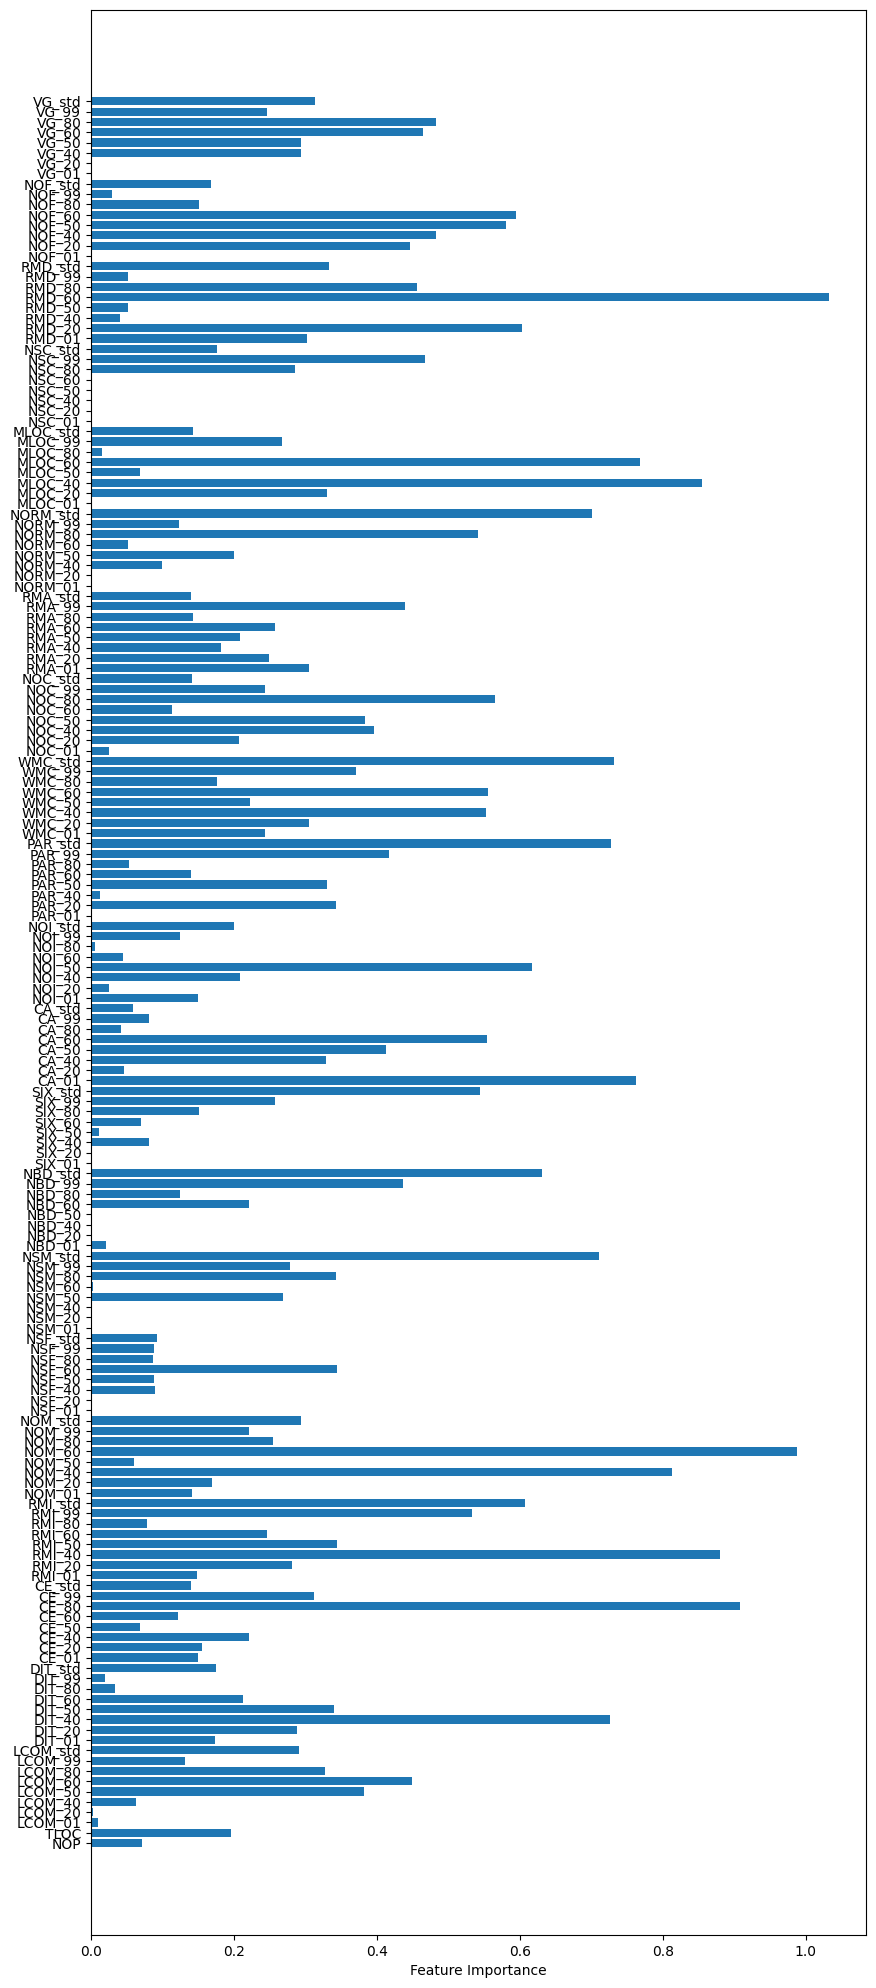

In [28]:
model = LinearRegression()
model.fit(Qcc_quant_z, TD['SonarQube_debt'])
SQ_LR_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), SQ_LR_importance)
plt.xlabel("Feature Importance")

# RidgeCV

Text(0.5, 0, 'Feature Importance')

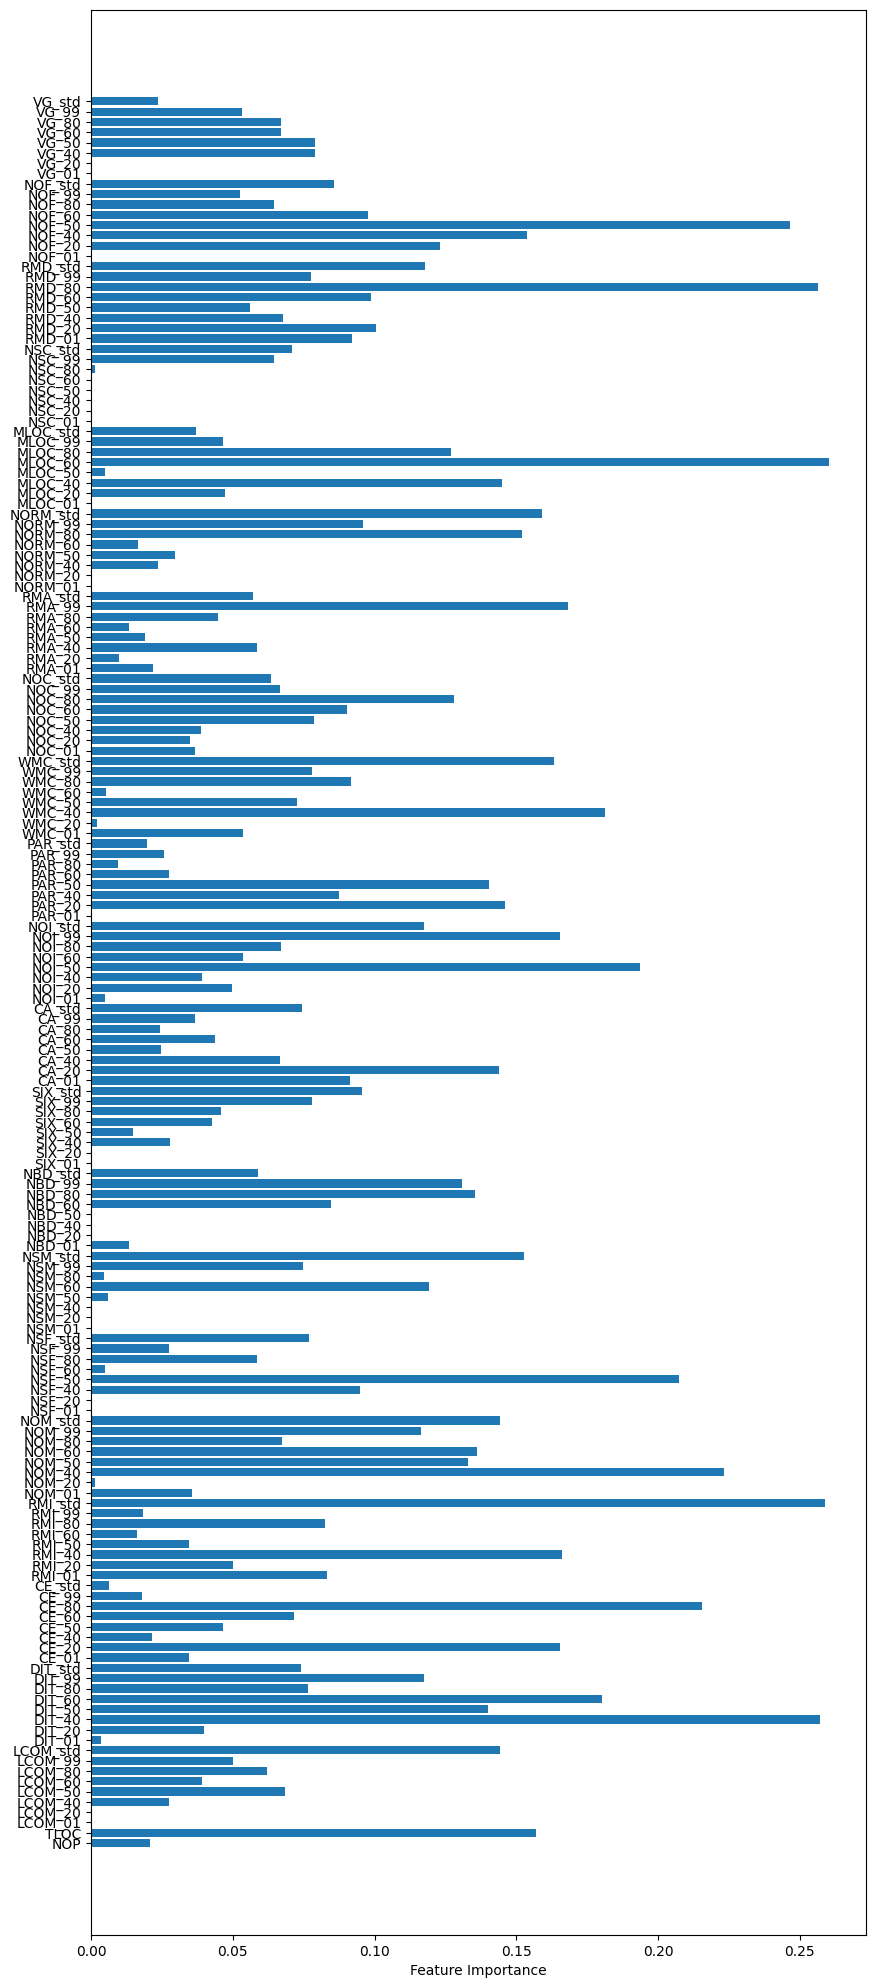

In [29]:
model = RidgeCV()
model.fit(Qcc_quant_z, TD['SonarQube_debt'])
SQ_Ridge_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), SQ_Ridge_importance)
plt.xlabel("Feature Importance")

## Random Forest

Text(0.5, 0, 'Feature Importance')

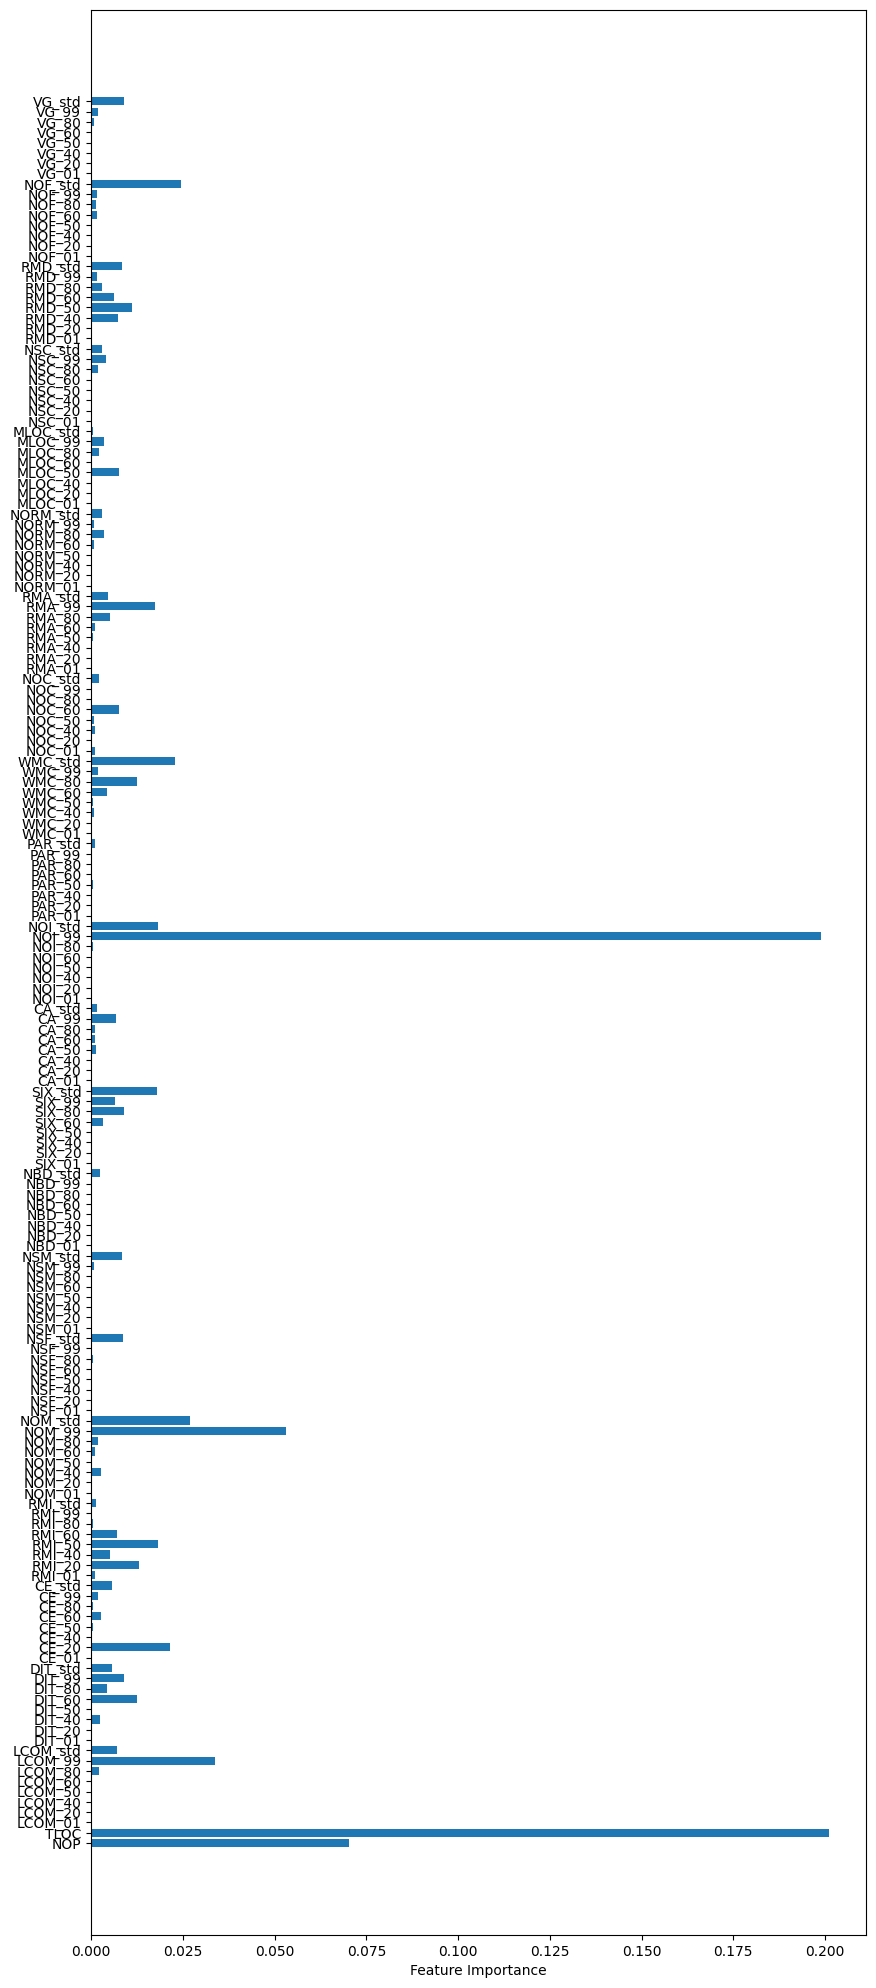

In [30]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(Qcc_quant_z, TD['SonarQube_debt'])
SQ_RF_importance = np.abs(rf.feature_importances_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z), SQ_RF_importance)
plt.xlabel("Feature Importance")

## XGboost

Text(0.5, 0, 'Feature Importance')

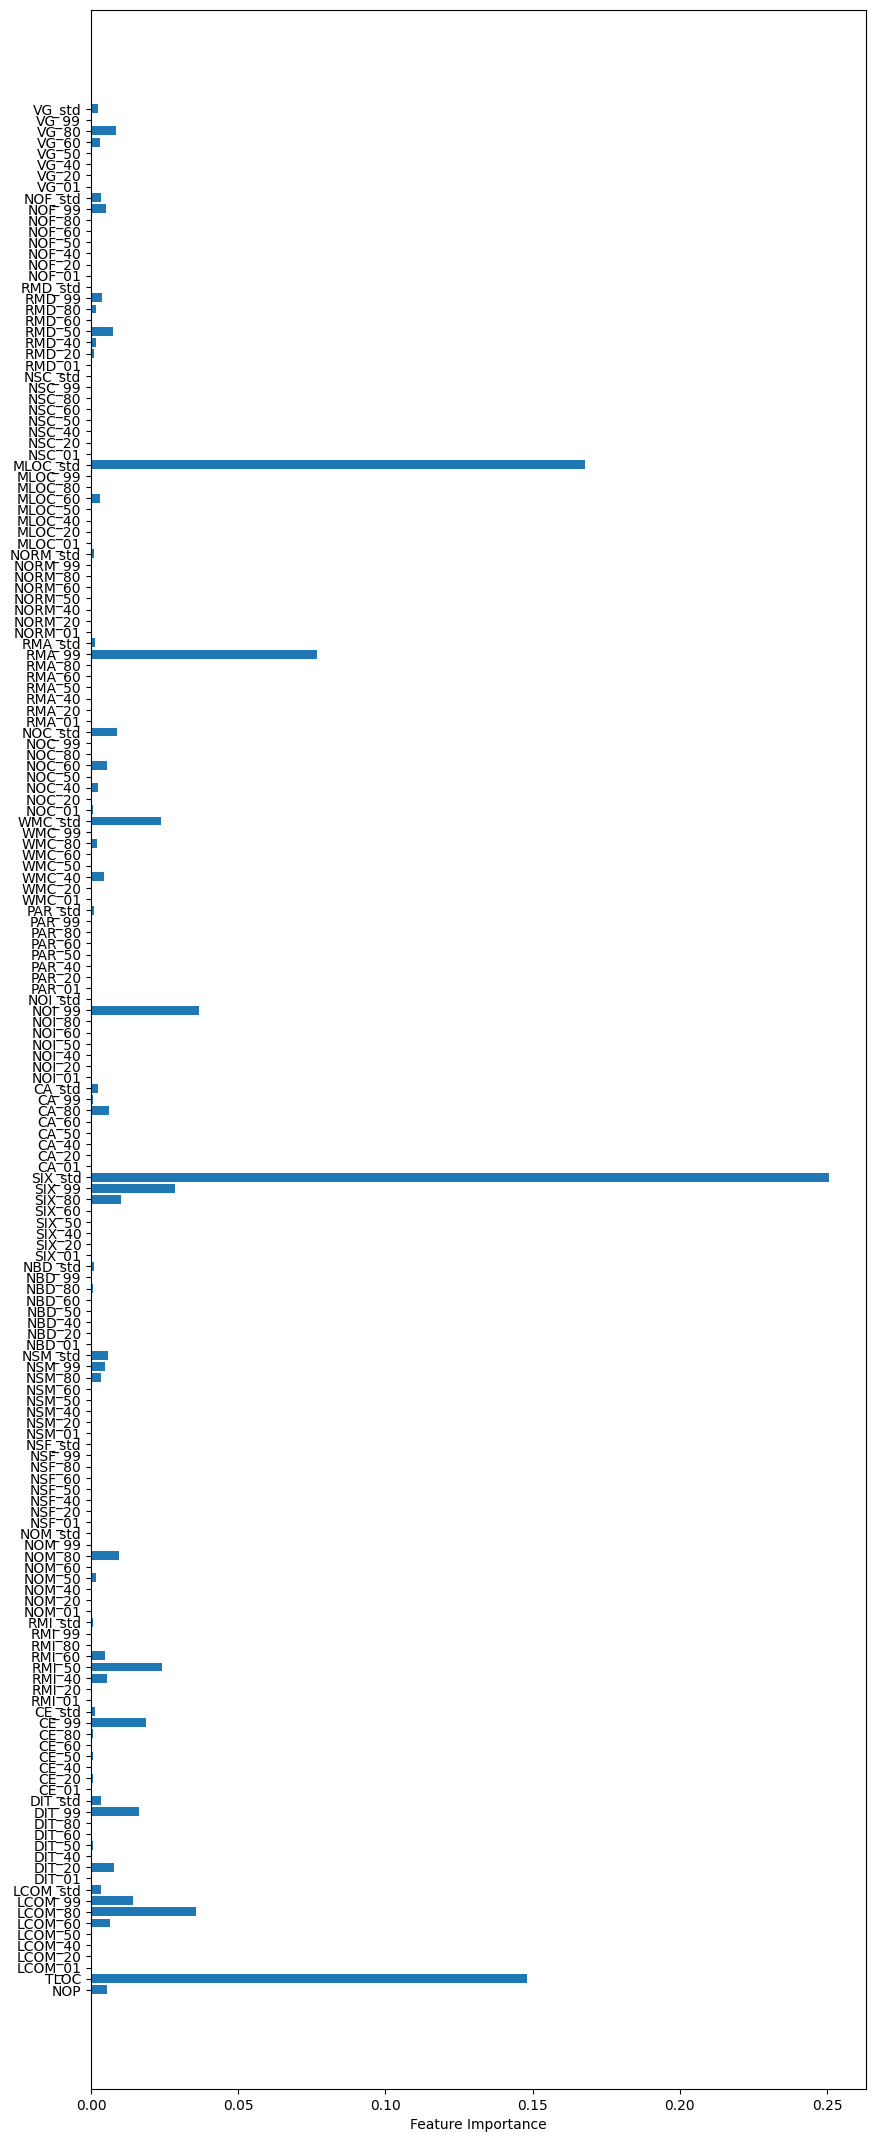

In [31]:
model = xgboost.XGBRegressor()
model.fit(Qcc_quant_z, TD['SonarQube_debt'])
SQ_XGB_importance = np.abs(model.feature_importances_)
plt.figure(figsize=(10,27))
plt.barh(list(Qcc_quant_z.columns), SQ_XGB_importance)
plt.xlabel("Feature Importance")

## KNN

Text(0.5, 0, 'Feature Importance')

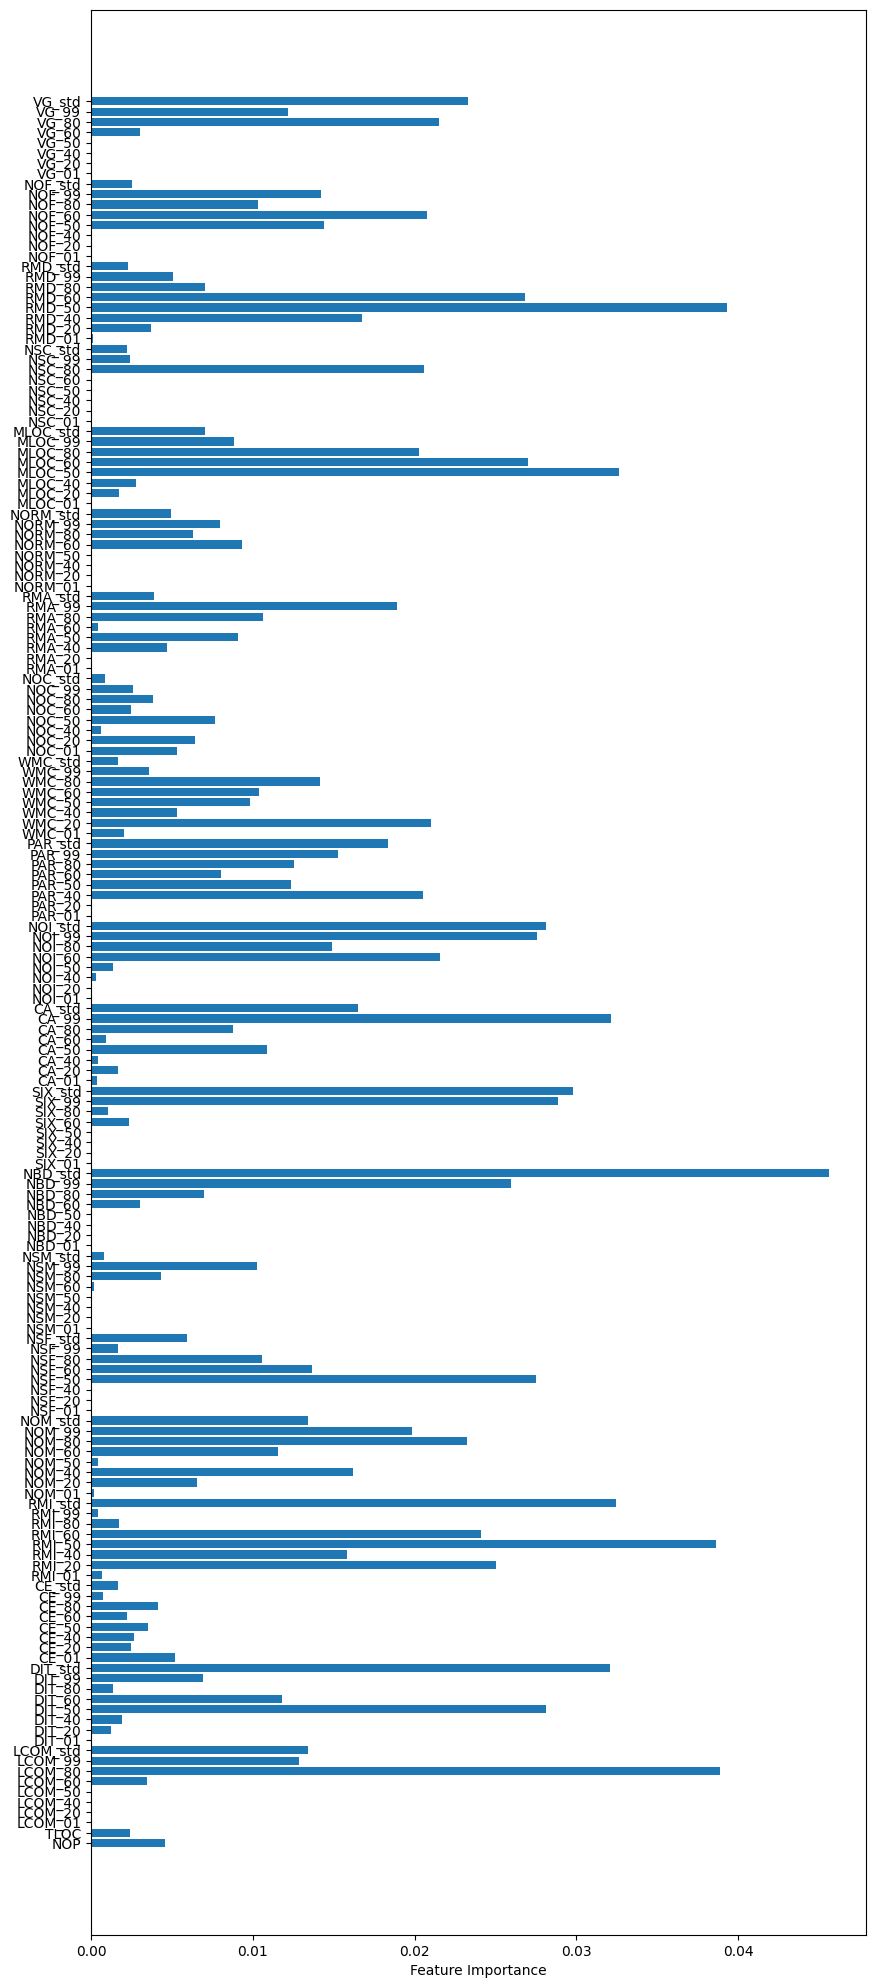

In [32]:
model = KNeighborsRegressor()
model.fit(Qcc_quant_z, TD['SonarQube_debt'])
results = permutation_importance(model, Qcc_quant_z, TD['SonarQube_debt'], scoring='neg_mean_squared_error')
SQ_KNN_importance = np.abs(results.importances_mean)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), SQ_KNN_importance)
plt.xlabel("Feature Importance")

## Avg

In [33]:
SQ = np.mean([SQ_KNN_importance,SQ_XGB_importance,SQ_RF_importance,SQ_Ridge_importance,SQ_LR_importance],axis=0)
arr = (SQ - SQ.min()) / (SQ.max() - SQ.min())
SQ_AVG = arr / arr.sum()
SQ_AVG.sum()

1.0

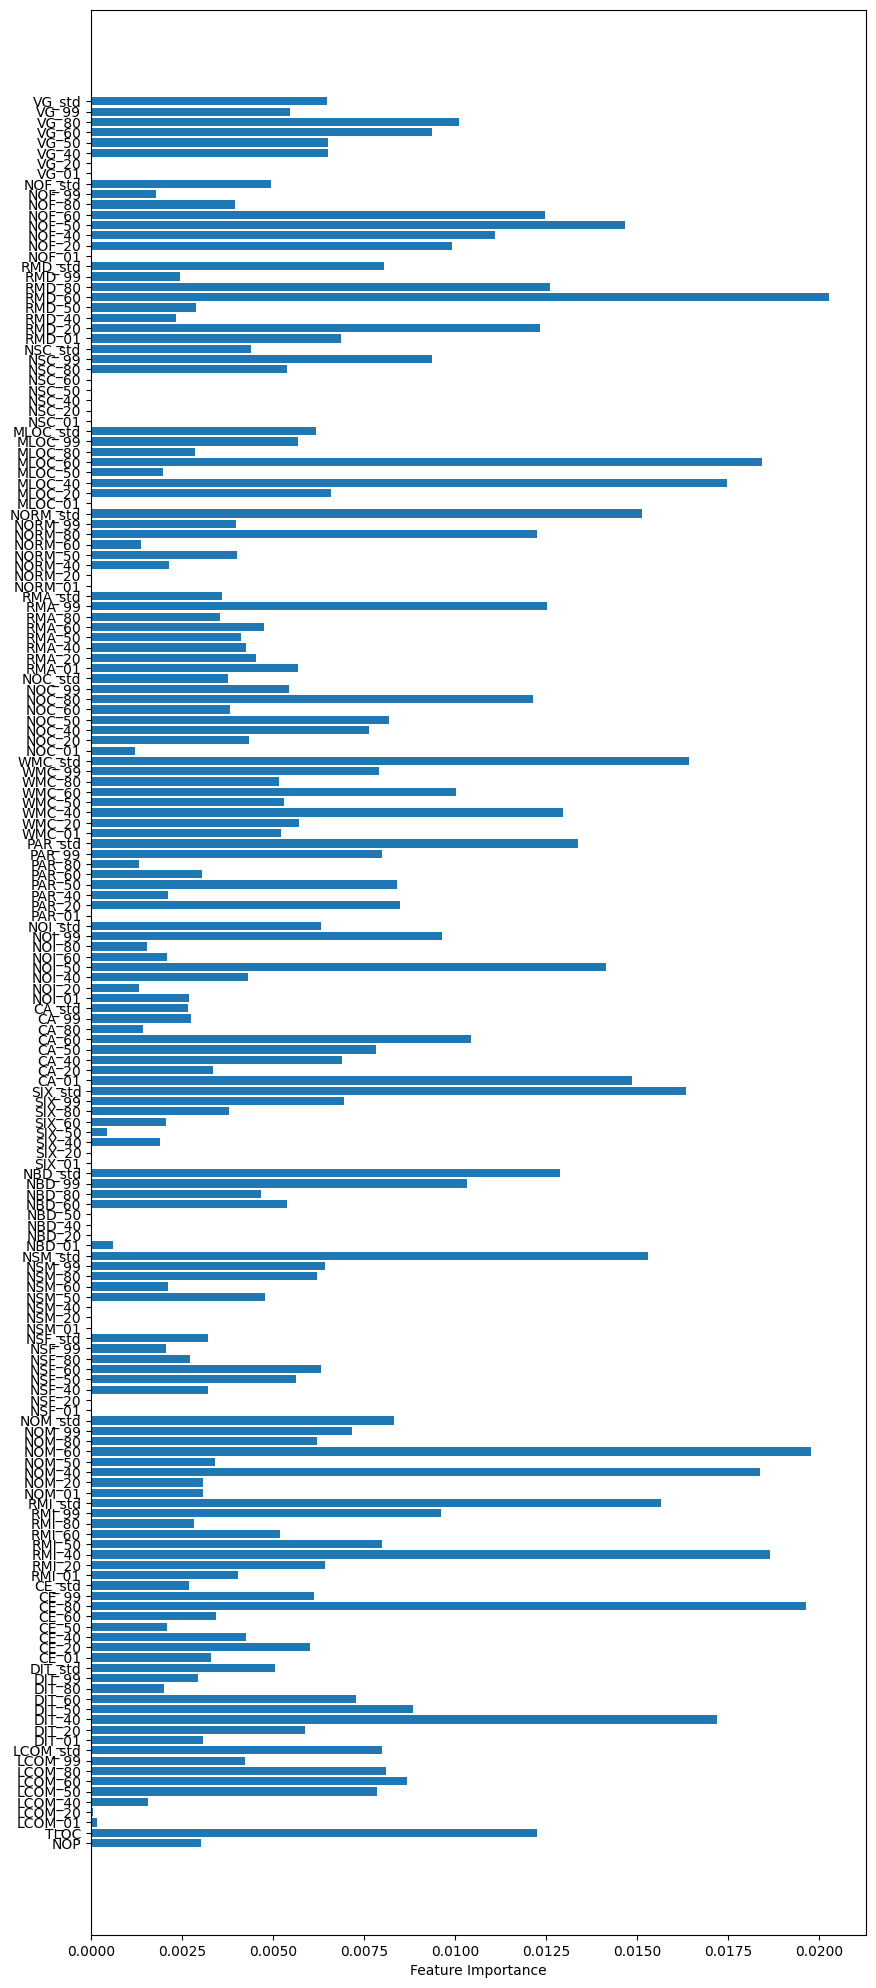

In [34]:
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), SQ_AVG)
plt.xlabel("Feature Importance")
plt.xlabel("Feature Importance")
plt.savefig('SonarQube_FI.png')

# Codiga

## LR

Text(0.5, 0, 'Feature Importance')

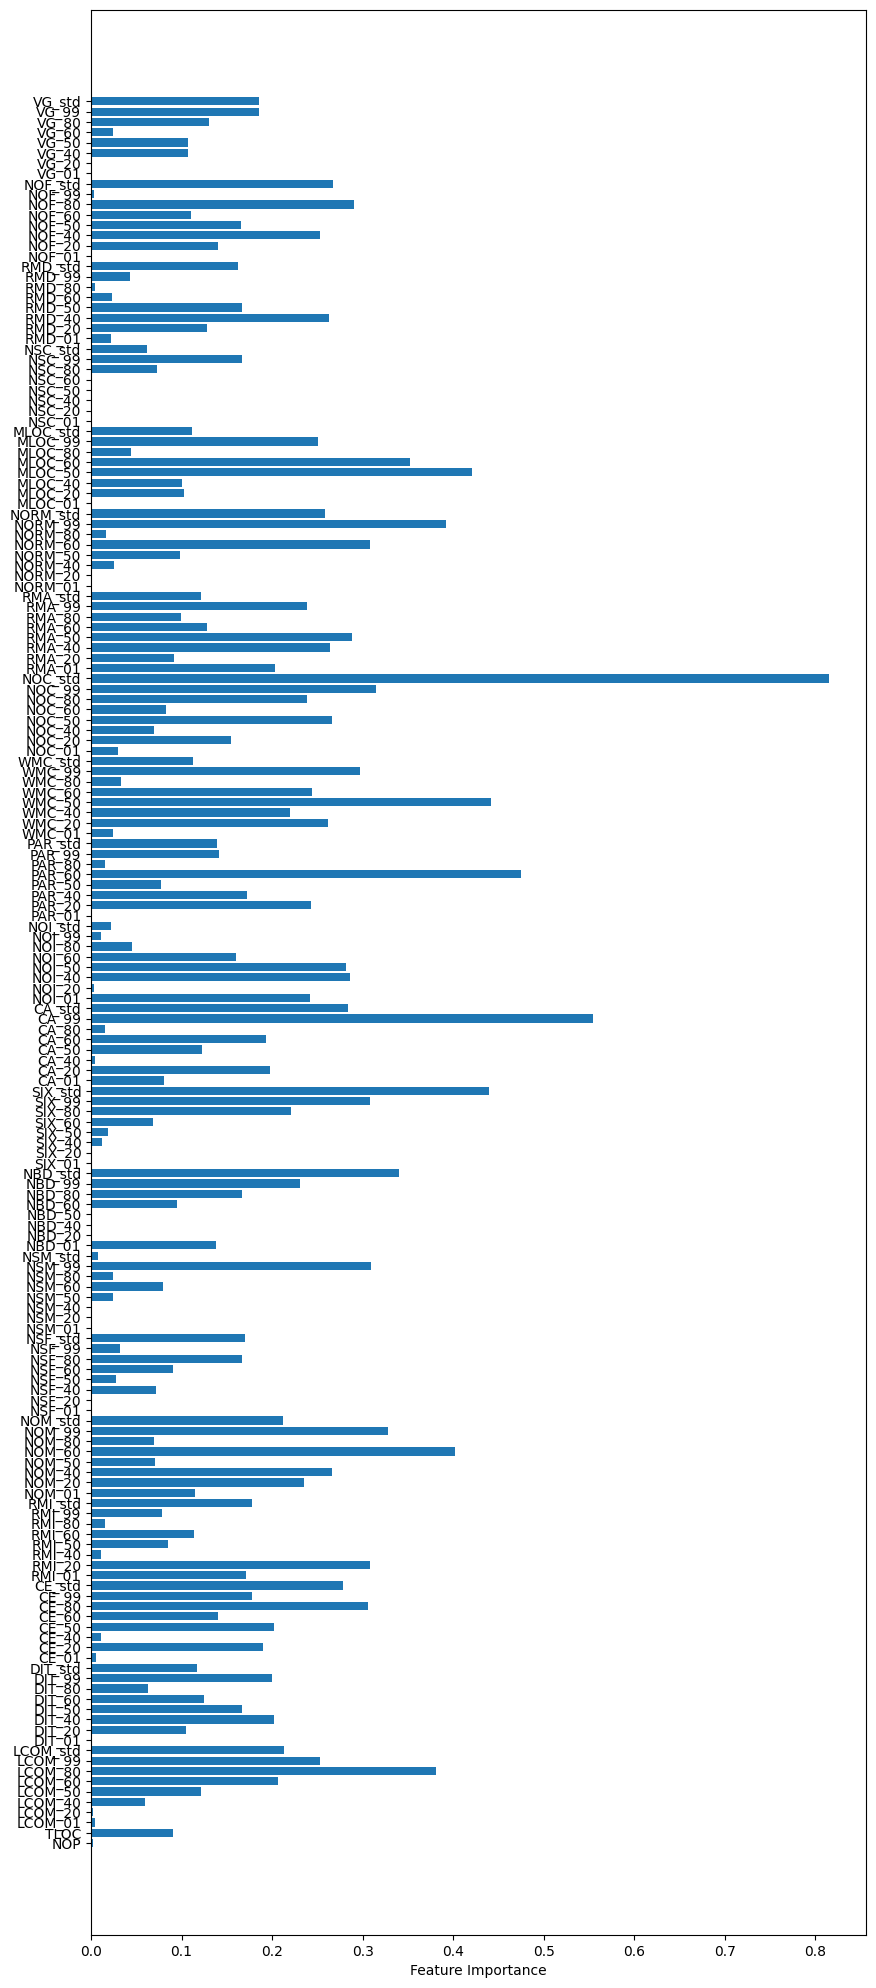

In [35]:
model = LinearRegression()
model.fit(Qcc_quant_z, TD['Codiga_debt'])
CO_LR_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CO_LR_importance)
plt.xlabel("Feature Importance")

## RidgeCV

Text(0.5, 0, 'Feature Importance')

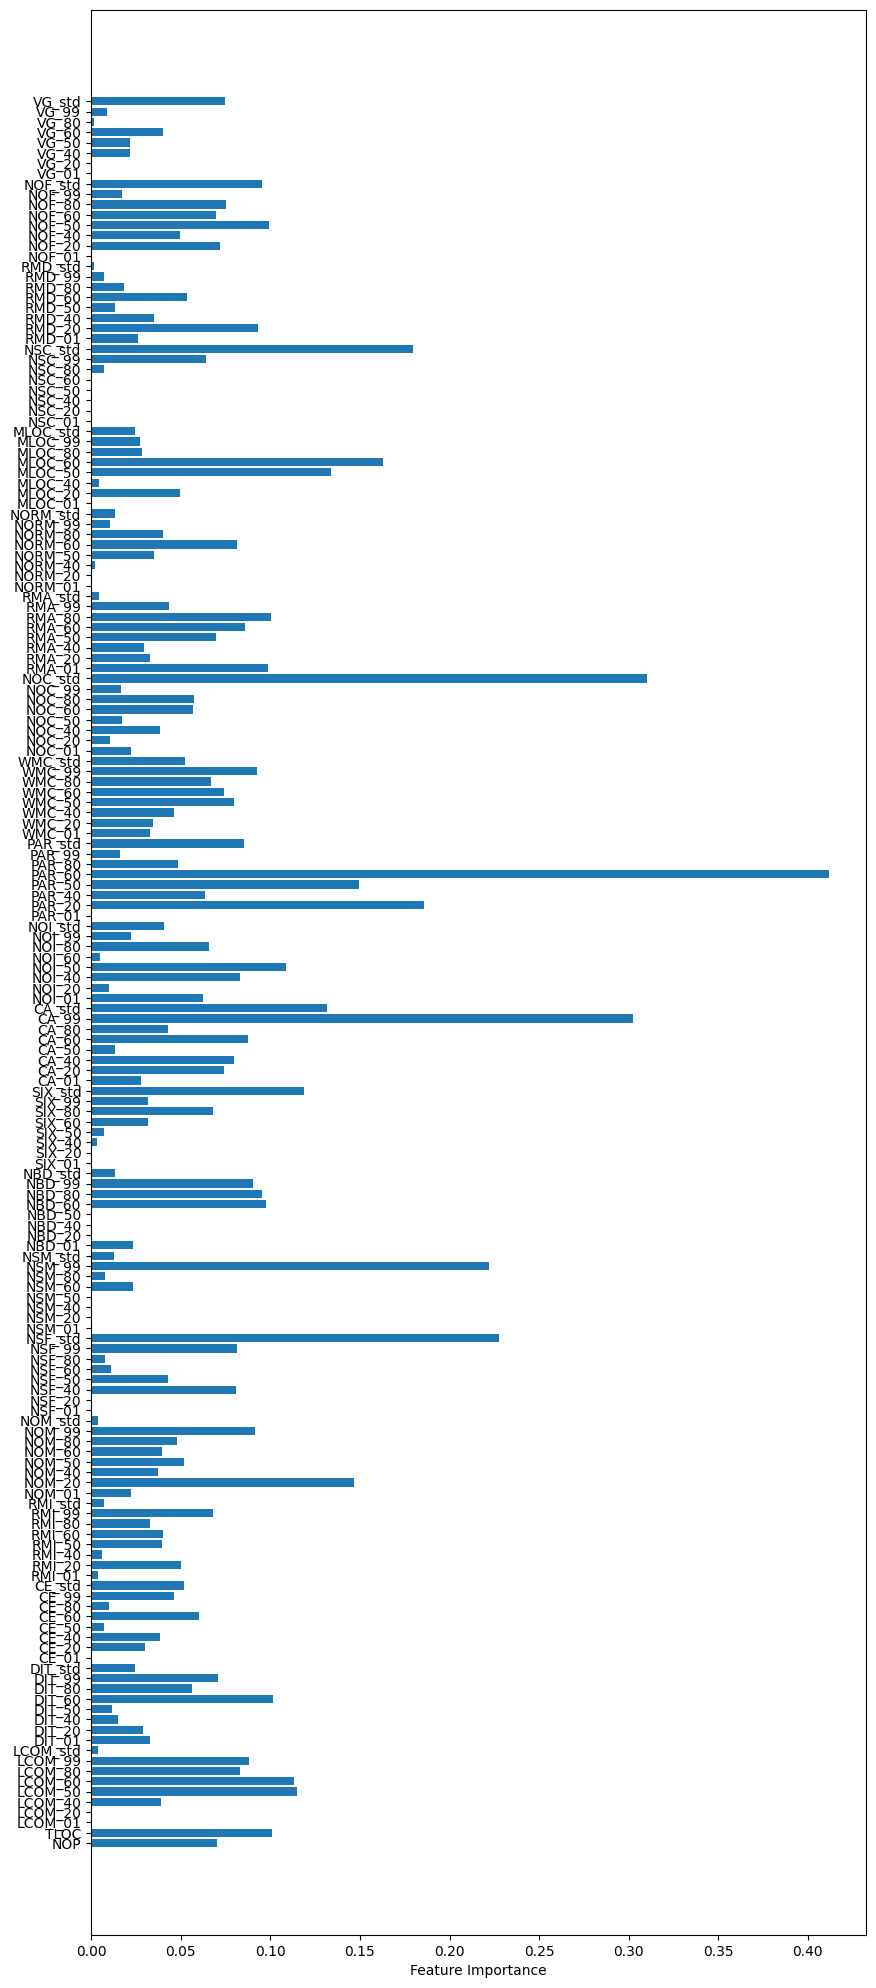

In [36]:
model = RidgeCV()
model.fit(Qcc_quant_z, TD['Codiga_debt'])
CO_Ridge_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CO_Ridge_importance)
plt.xlabel("Feature Importance")

## Random Forest

Text(0.5, 0, 'Feature Importance')

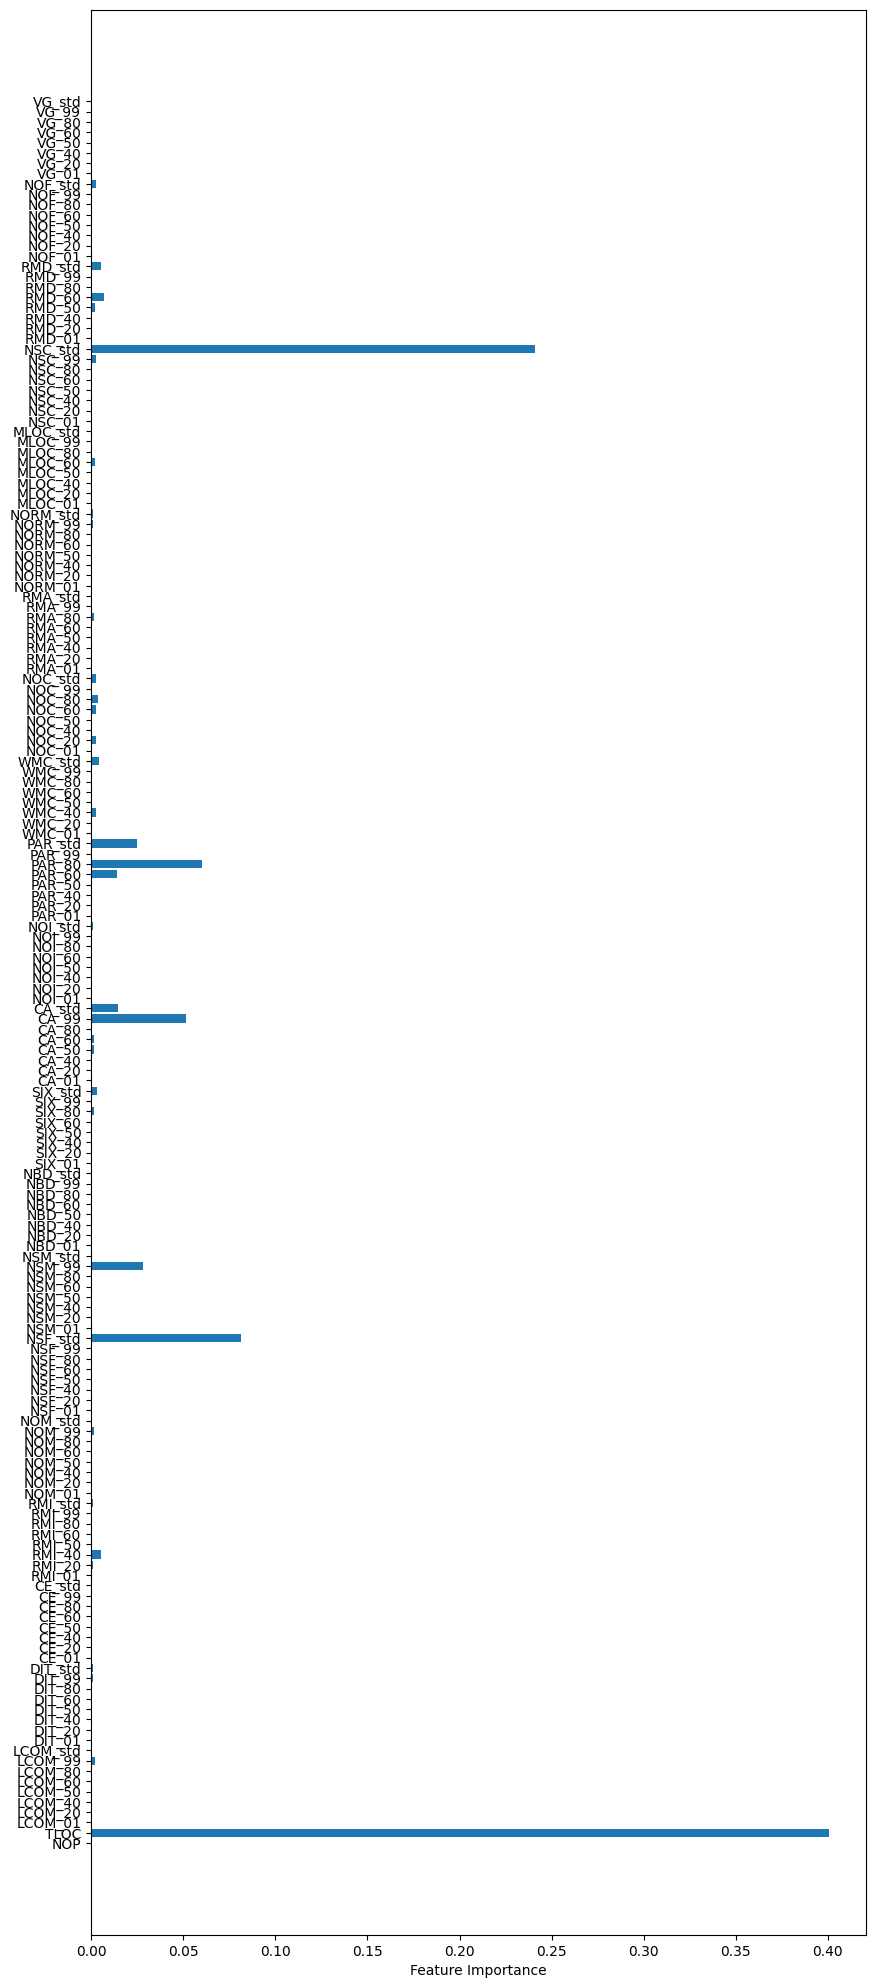

In [37]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(Qcc_quant_z, TD['Codiga_debt'])
CO_RF_importance = np.abs(rf.feature_importances_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z), CO_RF_importance)
plt.xlabel("Feature Importance")

## XGBoost

Text(0.5, 0, 'Feature Importance')

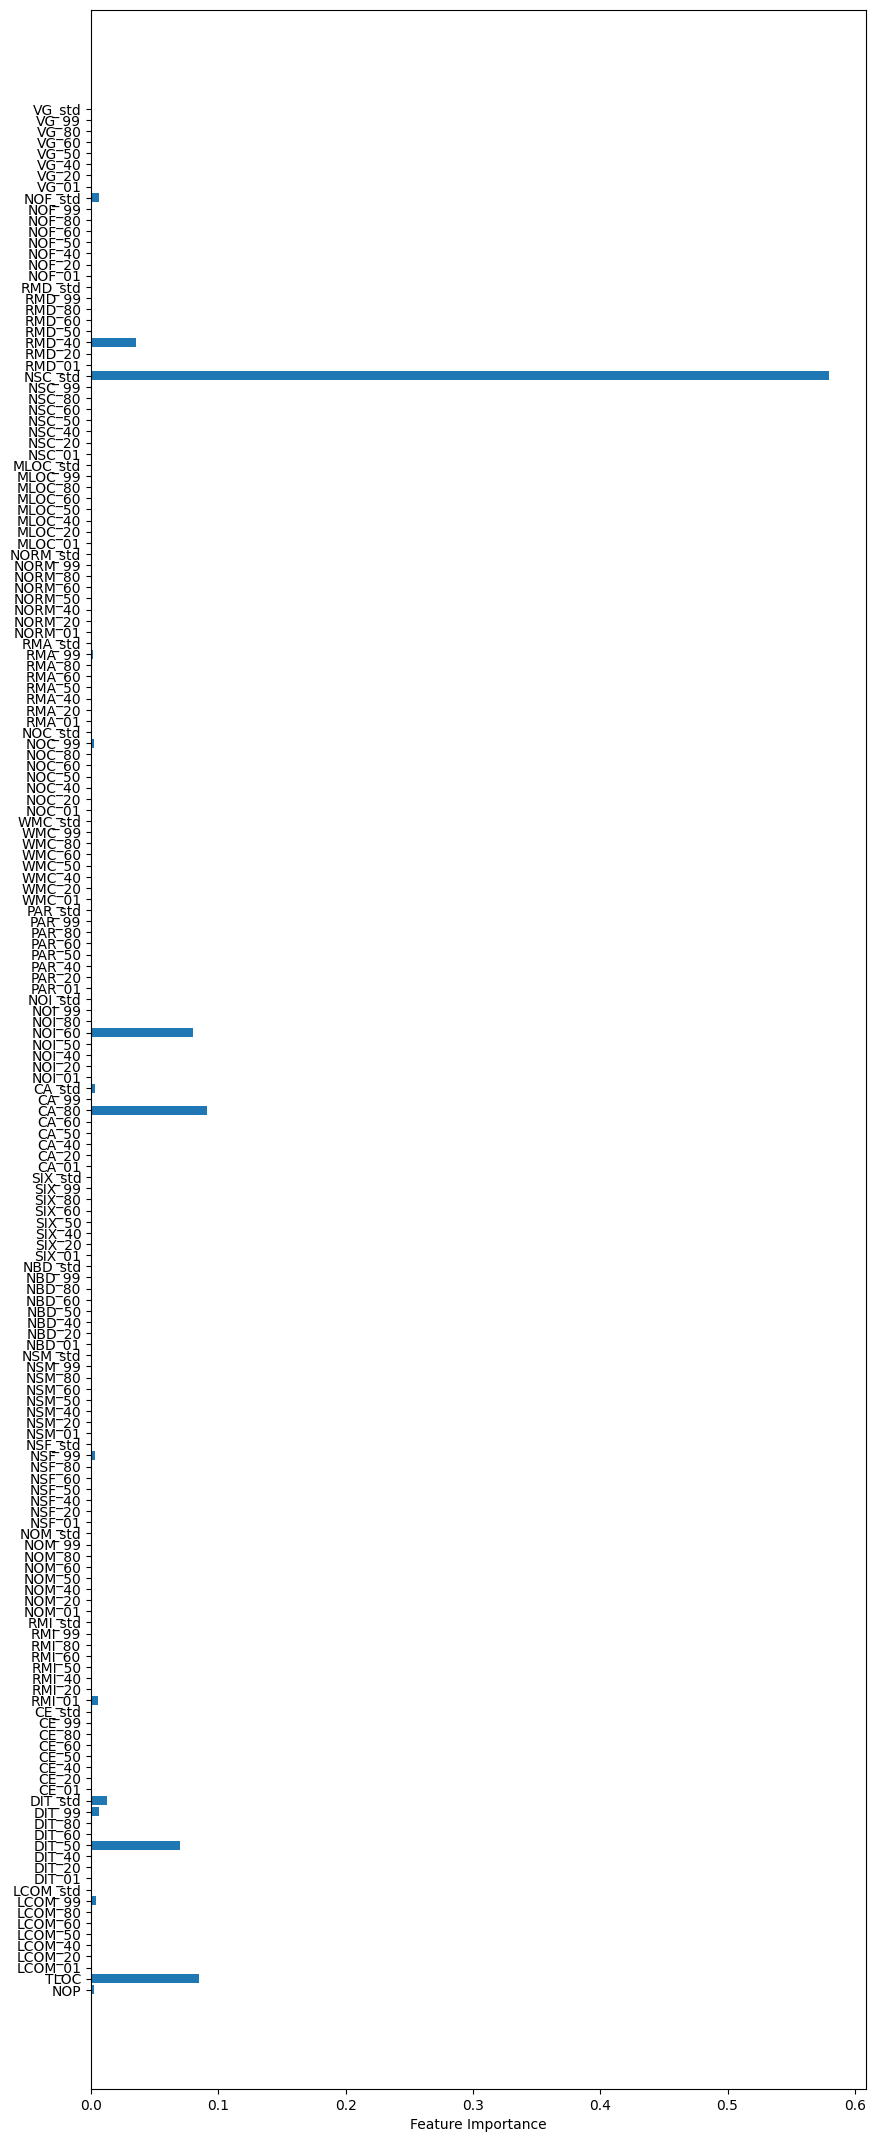

In [38]:
model = xgboost.XGBRegressor()
model.fit(Qcc_quant_z, TD['Codiga_debt'])
CO_XGB_importance = np.abs(model.feature_importances_)
plt.figure(figsize=(10,27))
plt.barh(list(Qcc_quant_z.columns), CO_XGB_importance)
plt.xlabel("Feature Importance")

## KNN

Text(0.5, 0, 'Feature Importance')

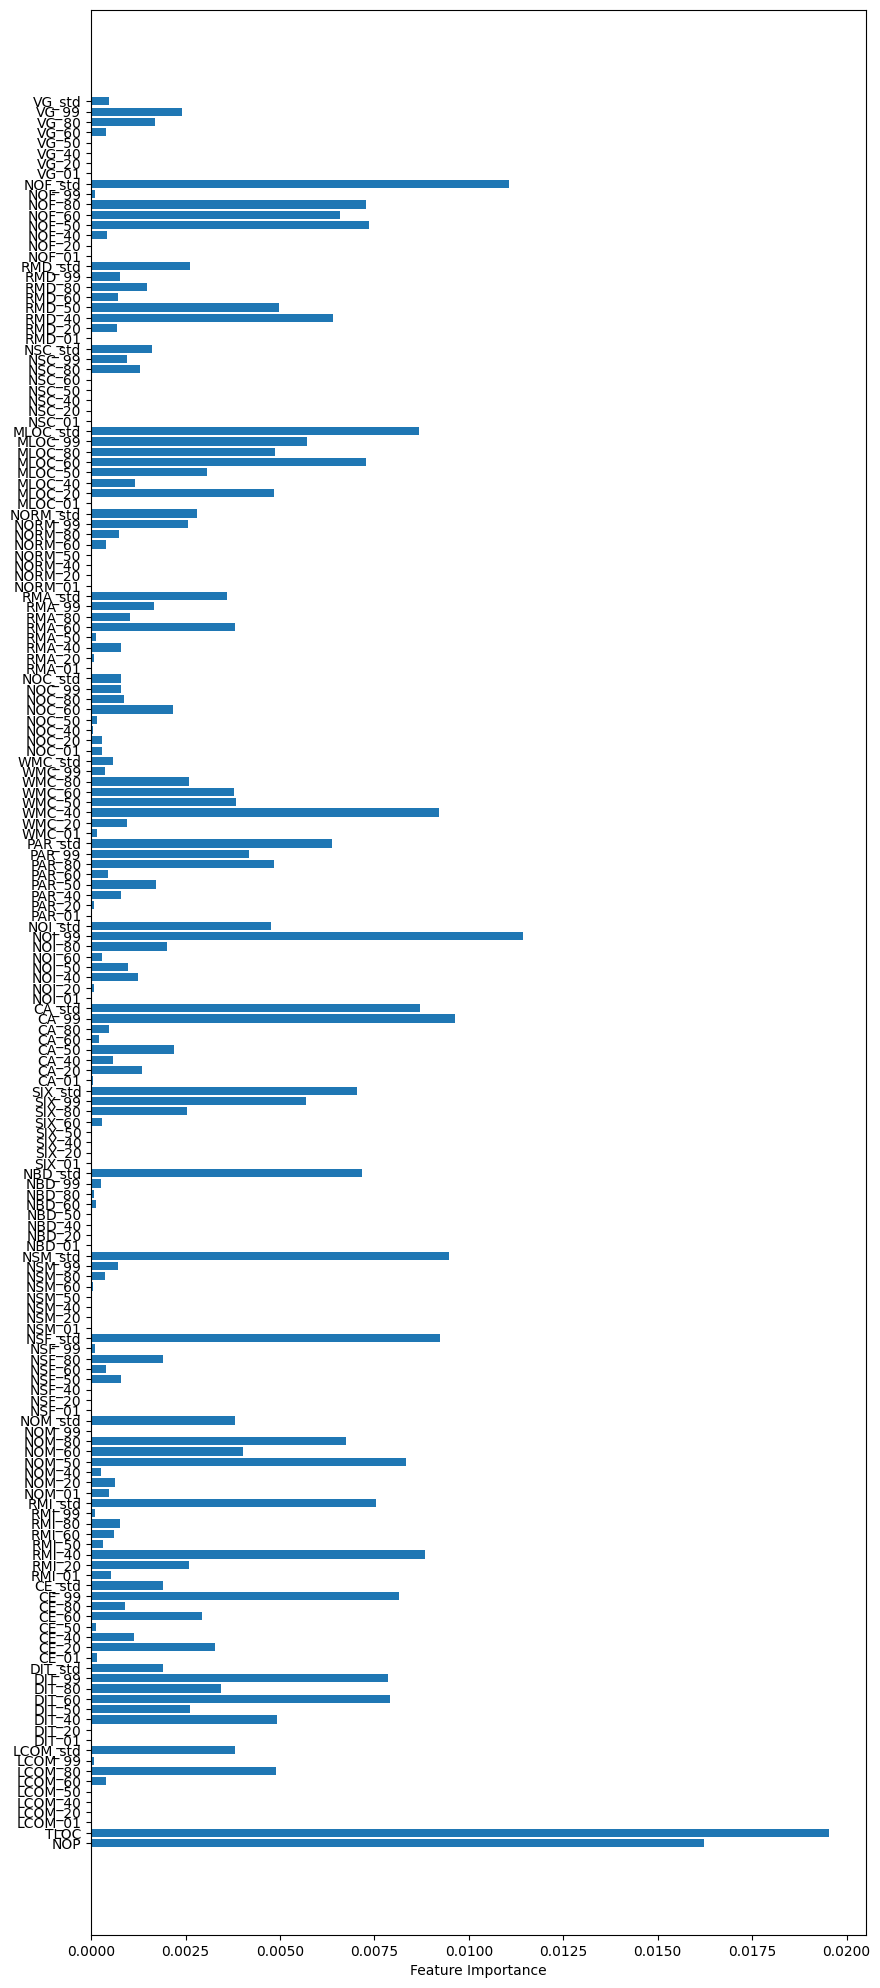

In [39]:
model = KNeighborsRegressor()
model.fit(Qcc_quant_z, TD['Codiga_debt'])
results = permutation_importance(model, Qcc_quant_z, TD['Codiga_debt'], scoring='neg_mean_squared_error')
CO_KNN_importance = np.abs(results.importances_mean)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CO_KNN_importance)
plt.xlabel("Feature Importance")

## Avg

In [40]:
CO= np.mean([CO_KNN_importance,CO_XGB_importance,CO_RF_importance,CO_Ridge_importance,CO_LR_importance],axis=0)
arr1 = (CO - CO.min()) / (CO.max() - CO.min())
CO_AVG = arr1 / arr1.sum()
CO_AVG.sum()

1.0000000000000002

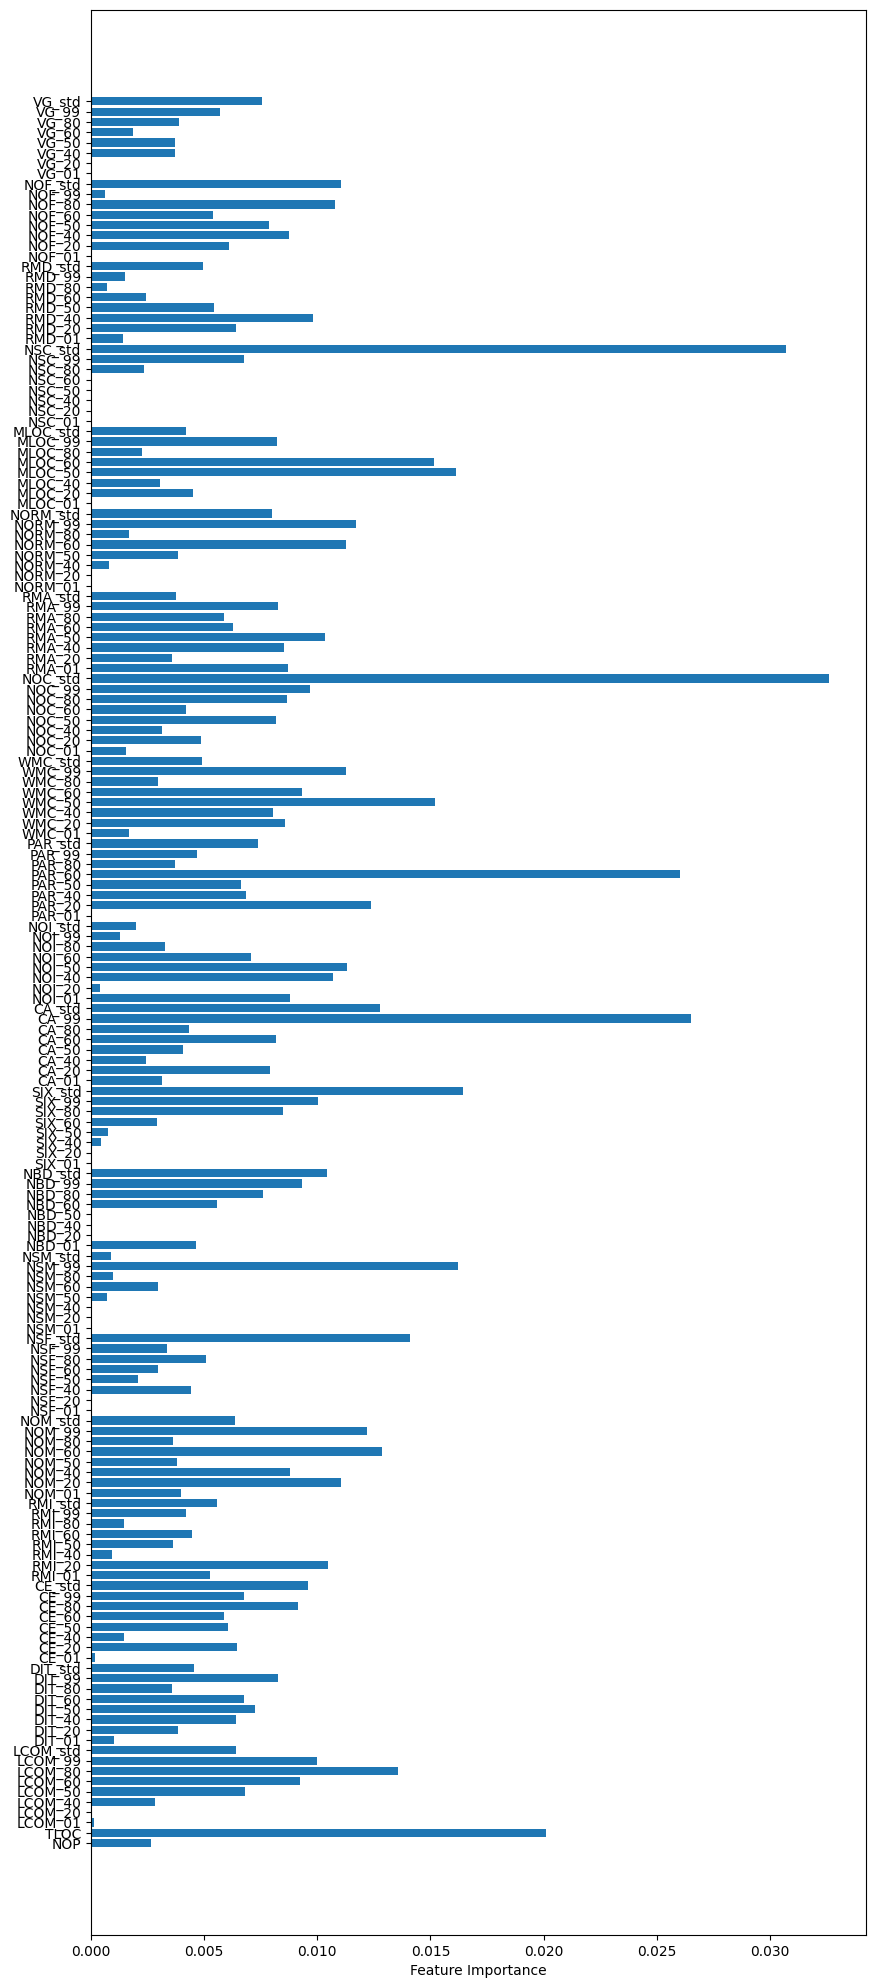

In [41]:
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CO_AVG)
plt.xlabel("Feature Importance")
plt.xlabel("Feature Importance")
plt.savefig('Codiga_FI.png')

# CodeClimate

## LR

Text(0.5, 0, 'Feature Importance')

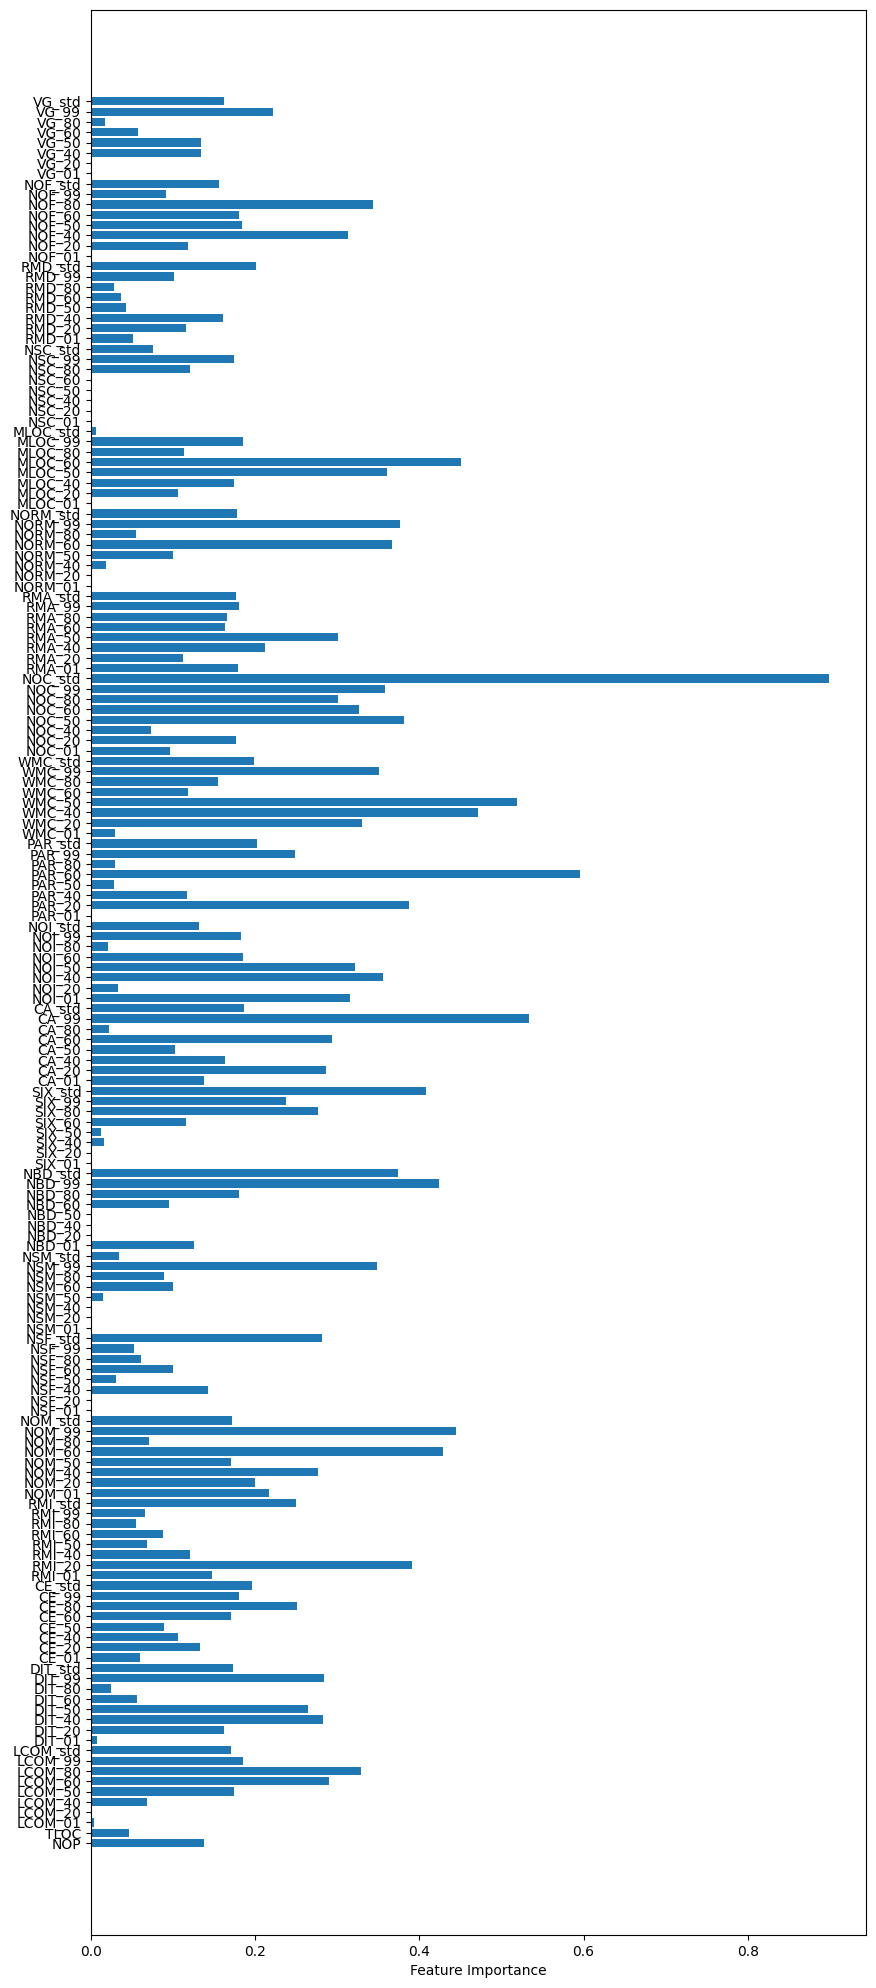

In [42]:
model = LinearRegression()
model.fit(Qcc_quant_z, TD['CodeClimate_debt'])
CC_LR_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CC_LR_importance)
plt.xlabel("Feature Importance")

## RideCV

Text(0.5, 0, 'Feature Importance')

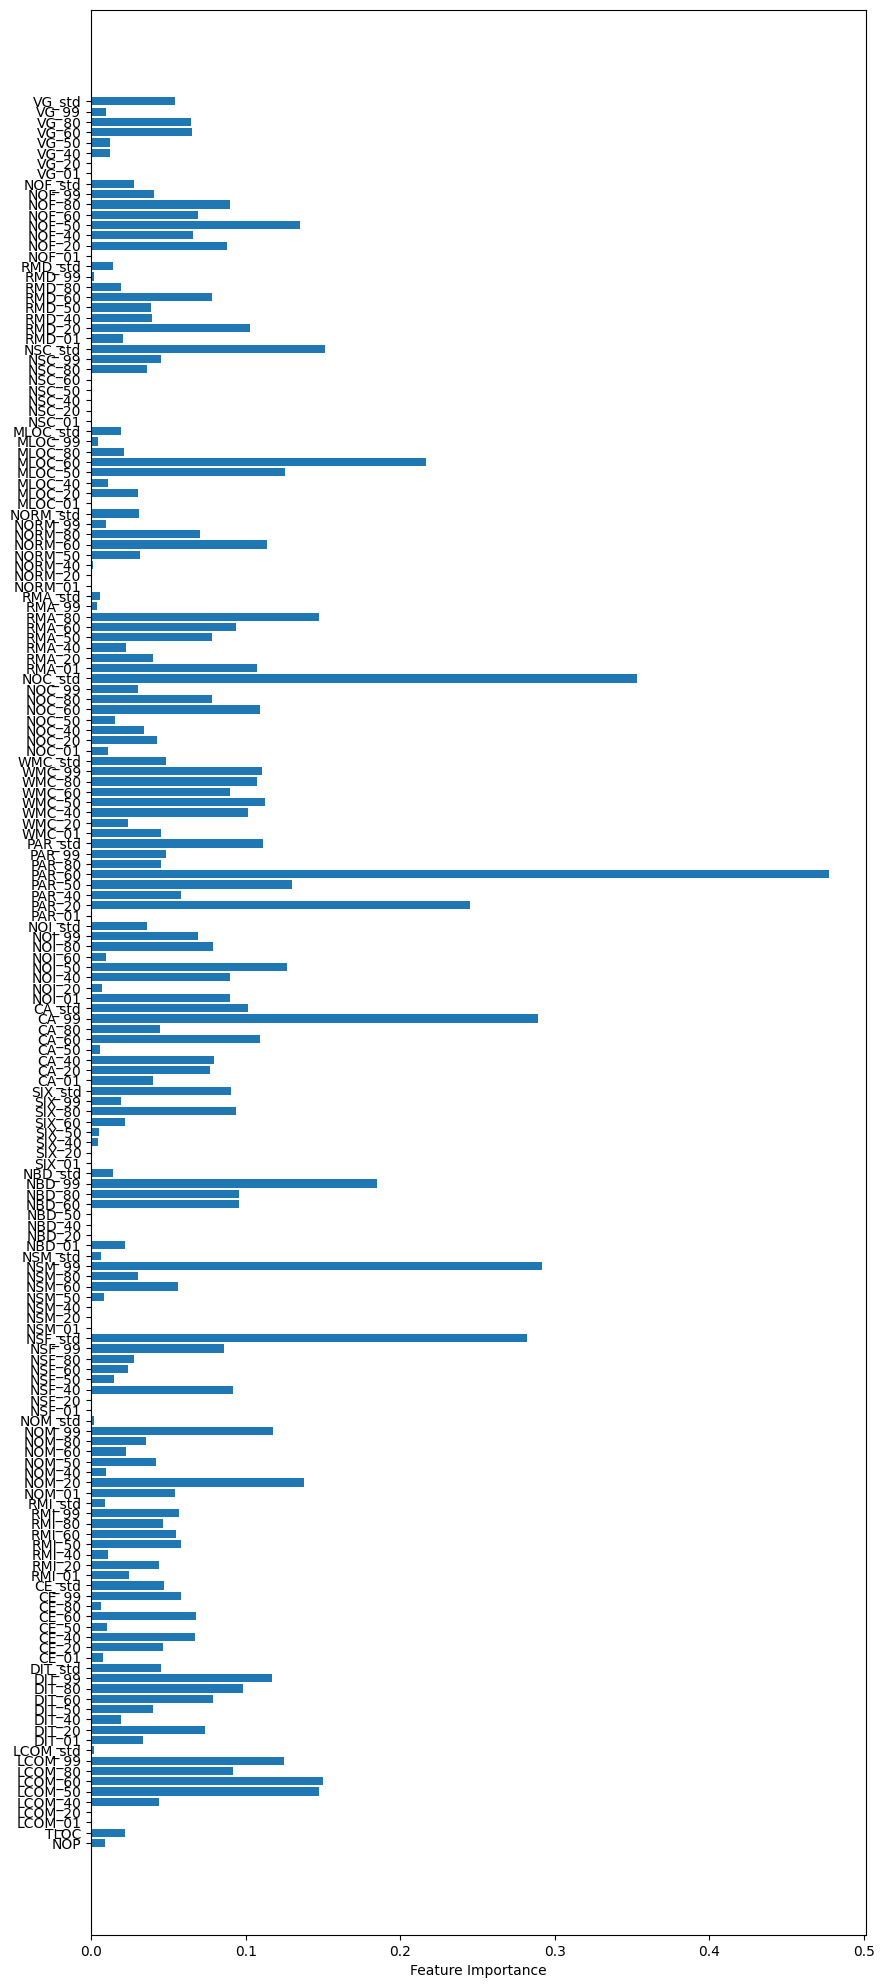

In [43]:
model = RidgeCV()
model.fit(Qcc_quant_z, TD['CodeClimate_debt'])
CC_Ridge_importance = np.abs(model.coef_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CC_Ridge_importance)
plt.xlabel("Feature Importance")

## Random Forest

Text(0.5, 0, 'Feature Importance')

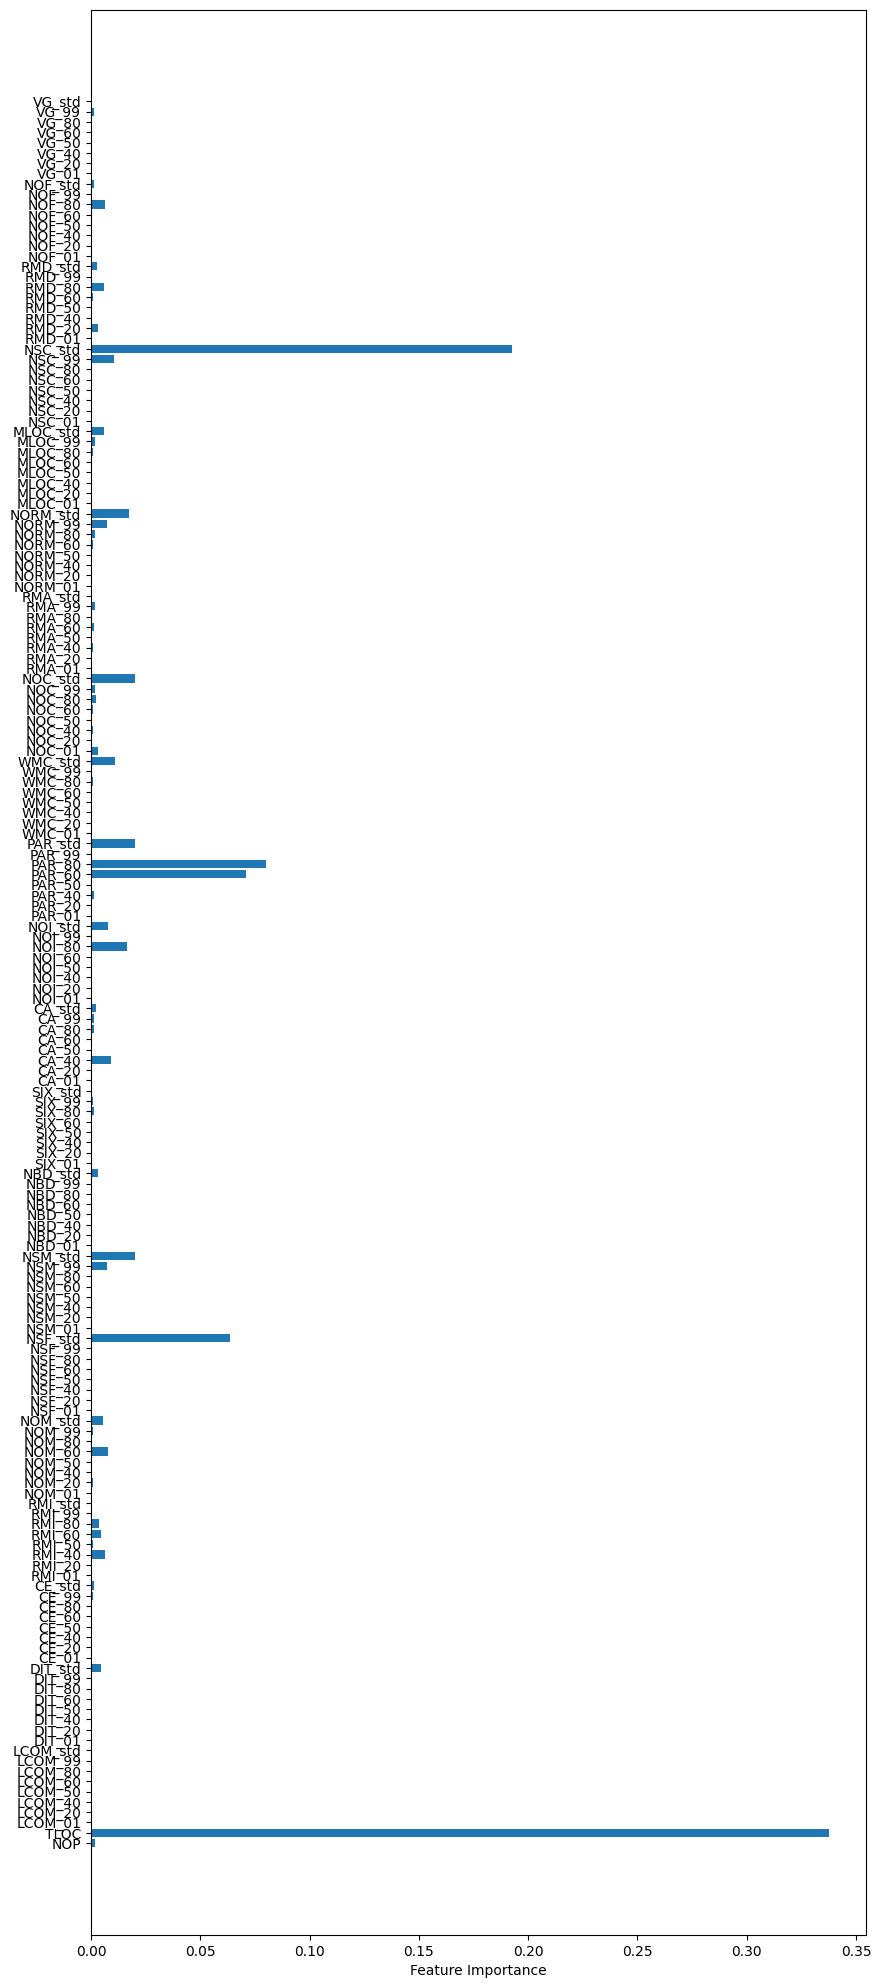

In [44]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(Qcc_quant_z, TD['CodeClimate_debt'])
CC_RF_importance = np.abs(rf.feature_importances_)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z), CC_RF_importance)
plt.xlabel("Feature Importance")

## XGBoost

Text(0.5, 0, 'Feature Importance')

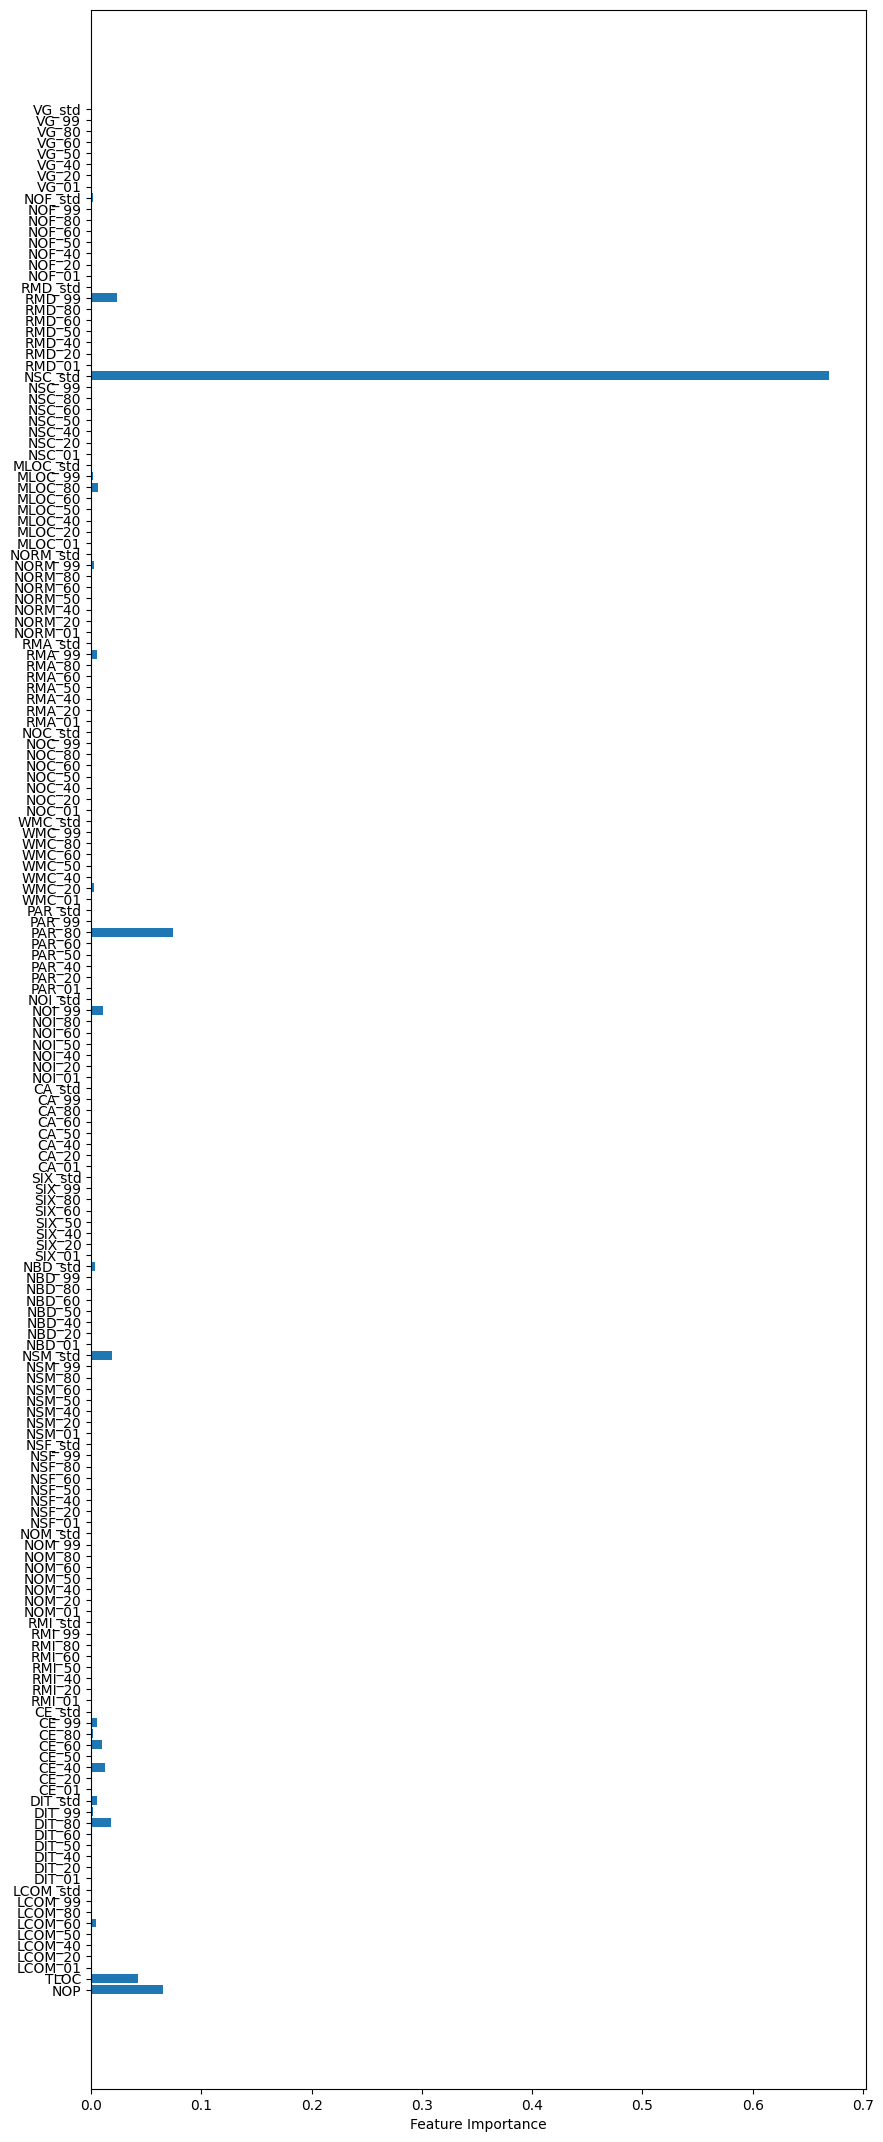

In [45]:
model = xgboost.XGBRegressor()
model.fit(Qcc_quant_z, TD['CodeClimate_debt'])
CC_XGB_importance = np.abs(model.feature_importances_)
plt.figure(figsize=(10,27))
plt.barh(list(Qcc_quant_z.columns), CC_XGB_importance)
plt.xlabel("Feature Importance")

## KNN

Text(0.5, 0, 'Feature Importance')

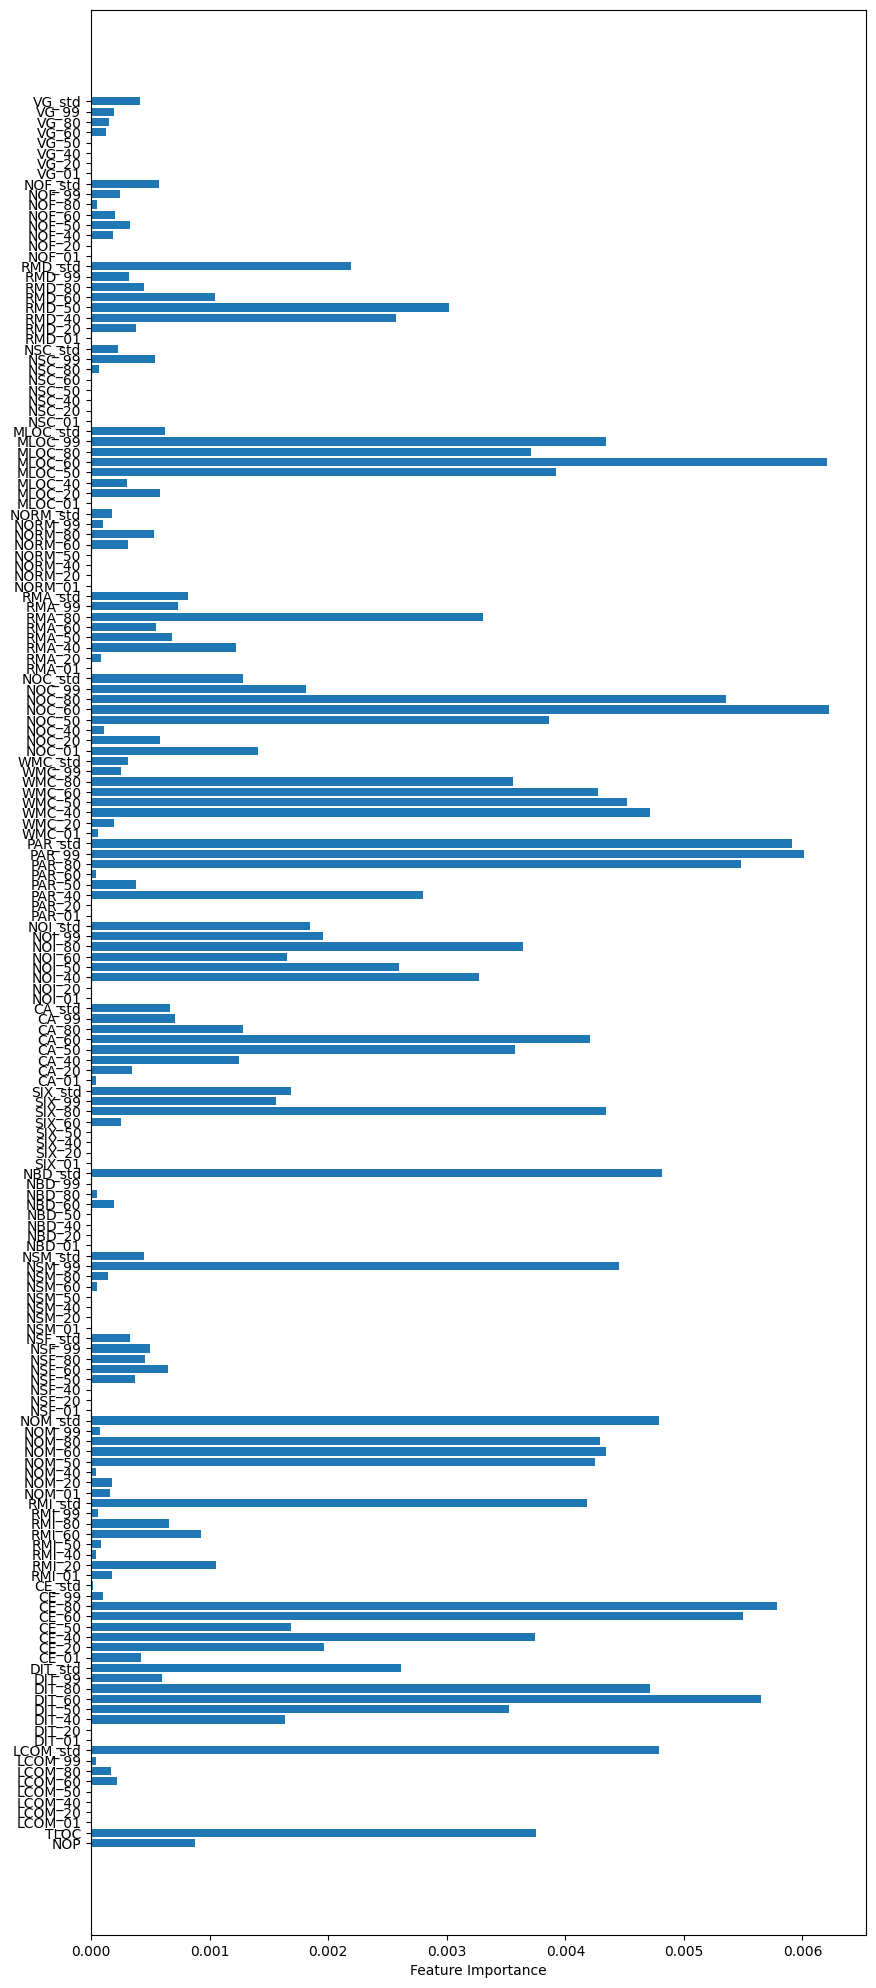

In [46]:
model = KNeighborsRegressor()
model.fit(Qcc_quant_z, TD['CodeClimate_debt'])
results = permutation_importance(model, Qcc_quant_z, TD['CodeClimate_debt'], scoring='neg_mean_squared_error')
CC_KNN_importance = np.abs(results.importances_mean)
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CC_KNN_importance)
plt.xlabel("Feature Importance")

## Avg

In [47]:
CC = np.mean([CC_KNN_importance,CC_XGB_importance,CC_RF_importance,CC_Ridge_importance,CC_LR_importance],axis=0)
arr2 = (CC - CC.min()) / (CC.max() - CC.min())
CC_AVG = arr2 / arr2.sum()
CC_AVG.sum()

0.9999999999999999

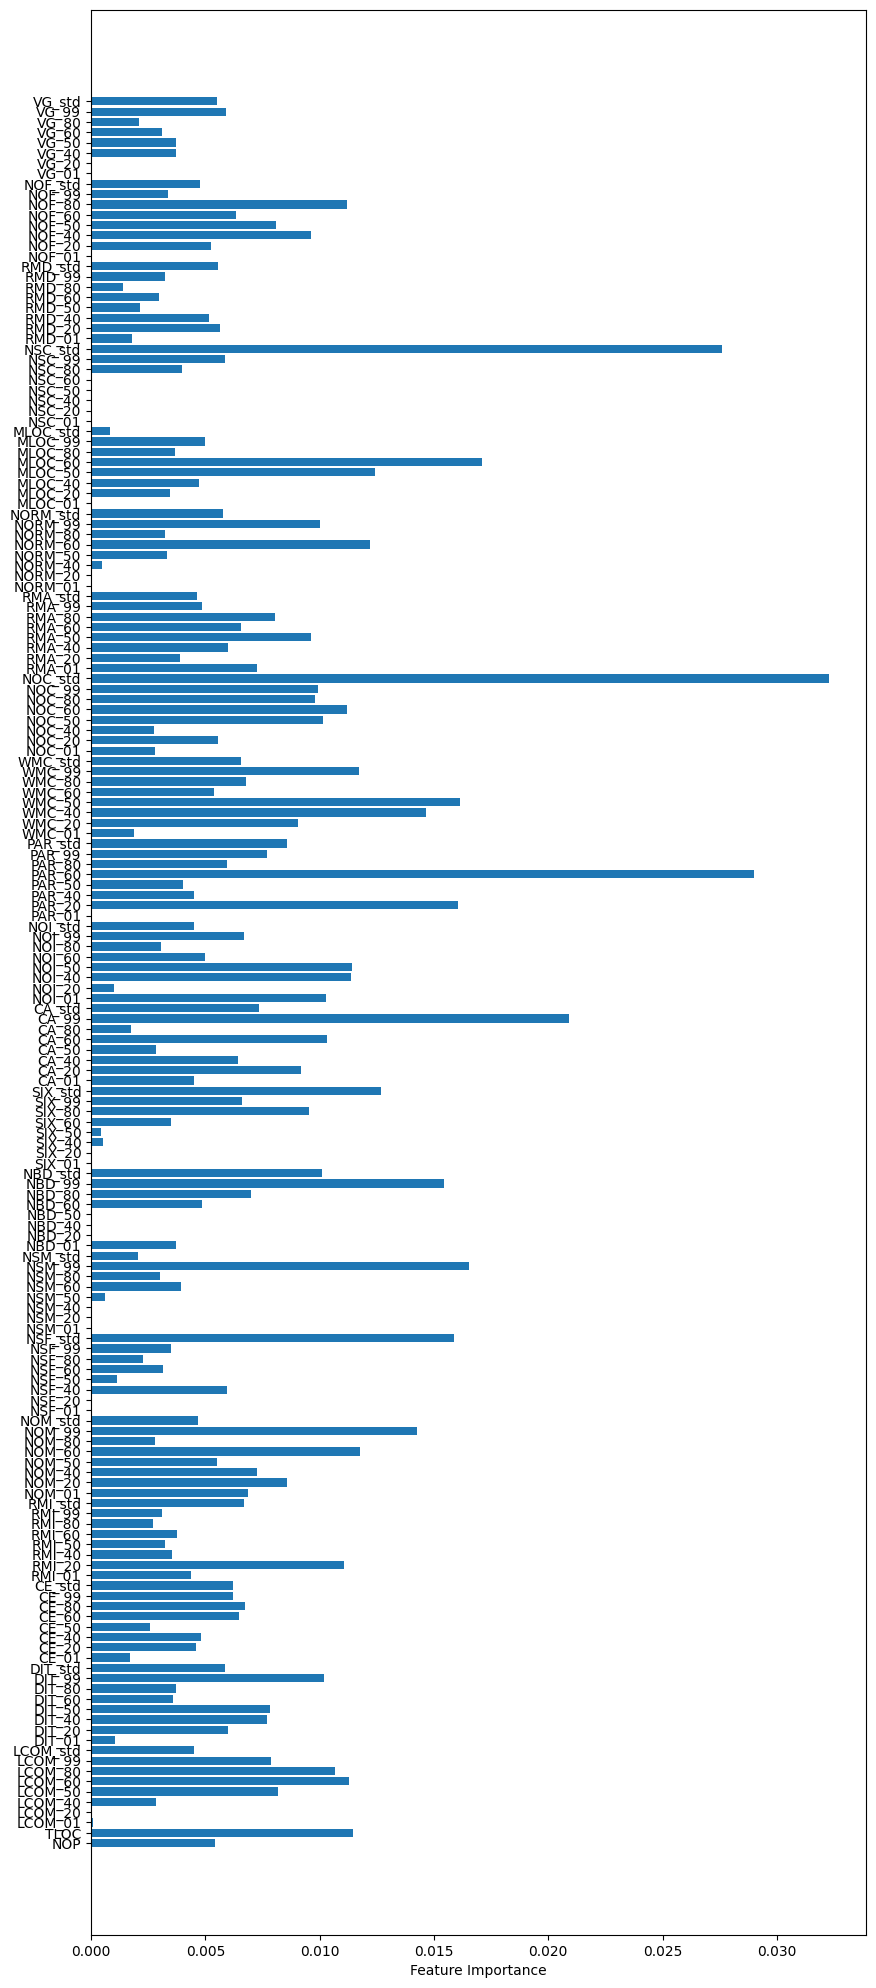

In [48]:
plt.figure(figsize=(10,25))
plt.barh(list(Qcc_quant_z.columns), CC_AVG)
plt.xlabel("Feature Importance")
plt.savefig('CodeClimate_FI.png')

In [49]:
data = pd.DataFrame({'Metrics': Qcc_quant_z.columns, 'SQ': SQ_AVG,'CO': CO_AVG,'CC': CC_AVG})

In [50]:
col1 = []
for i in range (len(list(data['Metrics']))):
    col1.append(list(data['Metrics'])[i].split("_")[0])
x1 = pd.Series(col1)    
col1 = x1.unique()
col1

array(['NOP', 'TLOC', 'LCOM', 'DIT', 'CE', 'RMI', 'NOM', 'NSF', 'NSM',
       'NBD', 'SIX', 'CA', 'NOI', 'PAR', 'WMC', 'NOC', 'RMA', 'NORM',
       'MLOC', 'NSC', 'RMD', 'NOF', 'VG'], dtype=object)

In [51]:
avrg_sq = []
avrg_co = []
avrg_cc = []
for i in range(len(col1)):
    contain_values = data[data['Metrics'].str.contains(col1[i])]
    avrg_sq.append({"Metric": col1[i],'Avg' : contain_values.loc[:,'SQ'].mean()})
    avrg_co.append({"Metric": col1[i],'Avg' : contain_values.loc[:,'CO'].mean()})
    avrg_cc.append({"Metric": col1[i],'Avg' : contain_values.loc[:,'CC'].mean()})

avrg_sq_df = pd.DataFrame.from_records(avrg_sq)
avrg_co_df = pd.DataFrame.from_records(avrg_co)
avrg_cc_df = pd.DataFrame.from_records(avrg_cc)

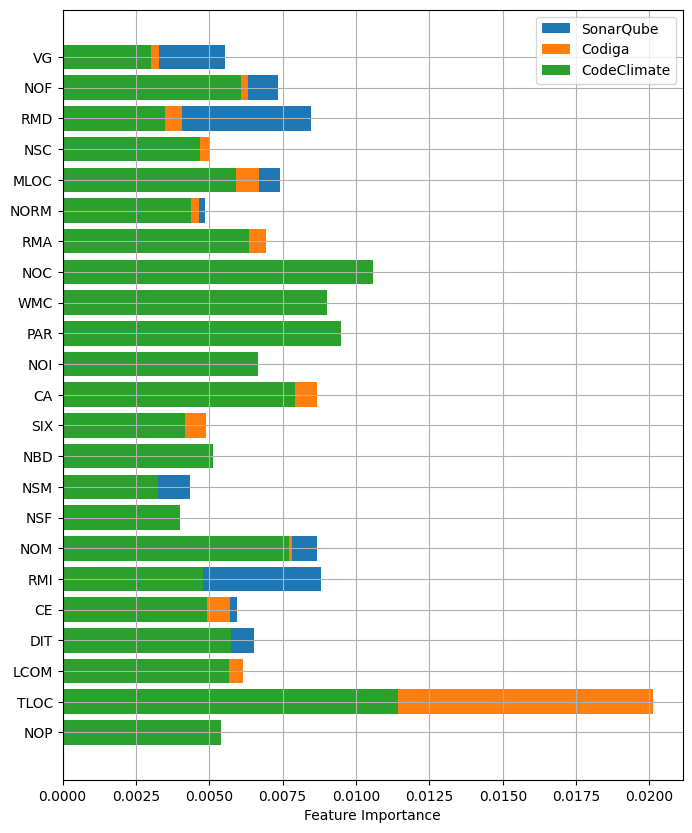

In [52]:
plt.figure(figsize=(8,10))
plt.barh(list(avrg_sq_df["Metric"]), avrg_sq_df['Avg'],label='SonarQube')
plt.barh(list(avrg_co_df["Metric"]), avrg_co_df['Avg'],label='Codiga')
plt.barh(list(avrg_cc_df["Metric"]), avrg_cc_df['Avg'],label='CodeClimate')
plt.xlabel("Feature Importance")
plt.legend()
plt.grid()
plt.savefig('FI.png')

# Compare all 3

In [54]:
f_Avg = np.mean([SQ_AVG,CO_AVG,CC_AVG],axis=0)
f_Avg.sum()

1.0

In [55]:
metric = [] 
for i,v in enumerate(list(Qcc_quant.iloc[:,2:].columns)):
    metric.append({"Metric": v, "SQ_Value": SQ_AVG[i], "CO_Value":CO_AVG[i],"CC_Value":CC_AVG[i], "Mean": f_Avg[i]})
SQ_metric_df = pd.DataFrame.from_records(metric)
SQ_metric_df

Metric      SQ_Value      CO_Value      CC_Value          Mean
0         NOP  3.007182e-03  2.627195e-03  5.403186e-03  3.679188e-03
1        TLOC  1.225705e-02  2.012278e-02  1.143673e-02  1.460552e-02
2     LCOM_01  1.565065e-04  1.397454e-04  8.064236e-05  1.256314e-04
3     LCOM_20  5.634854e-05  5.031385e-05  2.903444e-05  4.523228e-05
4     LCOM_40  1.560617e-03  2.830457e-03  2.853302e-03  2.414792e-03
5     LCOM_50  7.848118e-03  6.819776e-03  8.165775e-03  7.611223e-03
6     LCOM_60  8.676949e-03  9.253689e-03  1.128959e-02  9.740077e-03
7     LCOM_80  8.111140e-03  1.354605e-02  1.067582e-02  1.077767e-02
8     LCOM_99  4.224742e-03  1.000387e-02  7.869949e-03  7.366188e-03
9    LCOM_std  7.984625e-03  6.409952e-03  4.518104e-03  6.304227e-03
10     DIT_01  3.085167e-03  9.974873e-04  1.037344e-03  1.706666e-03
11     DIT_20  5.868120e-03  3.848329e-03  5.979852e-03  5.232100e-03
12     DIT_40  1.719266e-02  6.403573e-03  7.689356e-03  1.042853e-02
13     DIT_50  8.850481e-03  7.254181e-03  7.817269e-03  7.973977e-03
14     DIT_60  7.268960e-03  6.779927e-03  3.571392e-03  5.873426e-03
15     DIT_80  1.998842e-03  3.555098e-03  3.693856e-03  3.082598e-03
16     DIT_99  2.935856e-03  8.242776e-03  1.020777e-02  7.128801e-03
17    DIT_std  5.054121e-03  4.529045e-03  5.846177e-03  5.143114e-03
18      CE_01  3.301114e-03  1.805236e-04  1.709645e-03  1.730427e-03
19      CE_20  5.998571e-03  6.456723e-03  4.590751e-03  5.682015e-03
20      CE_40  4.260215e-03  1.465230e-03  4.825754e-03  3.517066e-03
21      CE_50  2.072914e-03  6.069476e-03  2.566813e-03  3.569734e-03
22      CE_60  3.443038e-03  5.874313e-03  6.449263e-03  5.255538e-03
23      CE_80  1.963967e-02  9.160890e-03  6.722608e-03  1.184106e-02
24      CE_99  6.115004e-03  6.750219e-03  6.191787e-03  6.352336e-03
25     CE_std  2.698300e-03  9.599368e-03  6.215282e-03  6.170983e-03
26     RMI_01  4.045857e-03  5.234575e-03  4.352540e-03  4.544324e-03
27     RMI_20  6.436143e-03  1.046038e-02  1.105892e-02  9.318480e-03
28     RMI_40  1.865646e-02  9.141361e-04  3.524229e-03  7.698276e-03
29     RMI_50  8.000401e-03  3.624914e-03  3.244648e-03  4.956654e-03
30     RMI_60  5.190779e-03  4.464000e-03  3.760981e-03  4.471920e-03
31     RMI_80  2.829866e-03  1.432751e-03  2.695263e-03  2.319293e-03
32     RMI_99  9.618825e-03  4.217077e-03  3.100812e-03  5.645571e-03
33    RMI_std  1.565957e-02  5.568112e-03  6.669372e-03  9.299019e-03
34     NOM_01  3.071349e-03  3.970049e-03  6.867912e-03  4.636437e-03
35     NOM_20  3.080900e-03  1.104402e-02  8.556878e-03  7.560599e-03
36     NOM_40  1.836393e-02  8.786365e-03  7.258039e-03  1.146944e-02
37     NOM_50  3.396520e-03  3.796293e-03  5.512408e-03  4.235073e-03
38     NOM_60  1.977021e-02  1.287999e-02  1.174646e-02  1.479889e-02
39     NOM_80  6.205849e-03  3.610229e-03  2.801005e-03  4.205694e-03
40     NOM_99  7.151147e-03  1.217694e-02  1.427284e-02  1.120031e-02
41    NOM_std  8.316139e-03  6.343190e-03  4.666555e-03  6.441961e-03
42     NSF_01  7.821123e-07  6.983514e-07  4.029952e-07  6.278196e-07
43     NSF_20  4.215341e-06  3.763896e-06  2.172018e-06  3.383752e-06
44     NSF_40  3.213103e-03  4.399917e-03  5.947110e-03  4.520044e-03
45     NSF_50  5.614079e-03  2.068285e-03  1.146353e-03  2.942906e-03
46     NSF_60  6.304099e-03  2.967853e-03  3.150993e-03  4.140982e-03
47     NSF_80  2.724906e-03  5.090741e-03  2.261667e-03  3.359105e-03
48     NSF_99  2.060591e-03  3.369800e-03  3.511161e-03  2.980517e-03
49    NSF_std  3.201009e-03  1.409101e-02  1.589309e-02  1.106170e-02
50     NSM_01  3.750813e-06  3.349117e-06  1.932663e-06  3.010864e-06
51     NSM_20  2.034249e-05  1.816389e-05  1.048177e-05  1.632939e-05
52     NSM_40  1.458293e-05  1.302116e-05  7.514075e-06  1.170605e-05
53     NSM_50  4.776037e-03  7.130142e-04  5.909683e-04  2.026673e-03
54     NSM_60  2.118249e-03  2.957286e-03  3.952425e-03  3.009320e-03
55     NSM_80  6.190566e-03  9.469203e-04  3.021782e-03  3.386423e-03
56     NSM_99  6.

In [57]:
SQ_metric_df = SQ_metric_df.sort_values(by='Mean', ascending=False)

In [58]:
SQ_metric_df.describe()

SQ_Value    CO_Value    CC_Value        Mean
count  170.000000  170.000000  170.000000  170.000000
mean     0.005882    0.005882    0.005882    0.005882
std      0.004984    0.005588    0.005347    0.004328
min      0.000000    0.000000    0.000000    0.000000
25%      0.002124    0.001658    0.002707    0.002985
50%      0.004765    0.004661    0.004838    0.005501
75%      0.008093    0.008510    0.008000    0.008205
max      0.020268    0.032630    0.032290    0.022894

In [59]:
SQ_metric_df

Metric      SQ_Value      CO_Value      CC_Value          Mean
113   NOC_std  3.761717e-03  3.262955e-02  3.228975e-02  2.289367e-02
145   NSC_std  4.393289e-03  3.072177e-02  2.760234e-02  2.090580e-02
94     PAR_60  3.057479e-03  2.604022e-02  2.901813e-02  1.937194e-02
134   MLOC_60  1.843542e-02  1.516039e-02  1.709425e-02  1.689668e-02
80      CA_99  2.731520e-03  2.650323e-02  2.091794e-02  1.671756e-02
73    SIX_std  1.633089e-02  1.643694e-02  1.269419e-02  1.515401e-02
38     NOM_60  1.977021e-02  1.287999e-02  1.174646e-02  1.479889e-02
1        TLOC  1.225705e-02  2.012278e-02  1.143673e-02  1.460552e-02
56     NSM_99  6.412950e-03  1.620356e-02  1.651768e-02  1.304473e-02
91     PAR_20  8.496217e-03  1.238369e-02  1.604039e-02  1.230677e-02
85     NOI_50  1.413556e-02  1.130295e-02  1.142600e-02  1.228817e-02
101    WMC_50  5.306456e-03  1.518637e-02  1.612864e-02  1.220716e-02
100    WMC_40  1.295996e-02  8.032001e-03  1.465902e-02  1.188366e-02
23      CE_80  1.963967e-02  9.160890e-03  6.722608e-03  1.184106e-02
64     NBD_99  1.033118e-02  9.327521e-03  1.542650e-02  1.169507e-02
36     NOM_40  1.836393e-02  8.786365e-03  7.258039e-03  1.146944e-02
40     NOM_99  7.151147e-03  1.217694e-02  1.427284e-02  1.120031e-02
65    NBD_std  1.287439e-02  1.042346e-02  1.010178e-02  1.113321e-02
49    NSF_std  3.201009e-03  1.409101e-02  1.589309e-02  1.106170e-02
7     LCOM_80  8.111140e-03  1.354605e-02  1.067582e-02  1.077767e-02
12     DIT_40  1.719266e-02  6.403573e-03  7.689356e-03  1.042853e-02
104    WMC_99  7.901454e-03  1.128867e-02  1.172986e-02  1.030666e-02
111    NOC_80  1.213064e-02  8.675969e-03  9.809486e-03  1.020537e-02
157    NOF_50  1.465130e-02  7.860904e-03  8.084118e-03  1.019878e-02
133   MLOC_50  1.966465e-03  1.611707e-02  1.242523e-02  1.016959e-02
156    NOF_40  1.107777e-02  8.756058e-03  9.619117e-03  9.817648e-03
97    PAR_std  1.336262e-02  7.383737e-03  8.588527e-03  9.778295e-03
6     LCOM_60  8.676949e-03  9.253689e-03  1.128959e-02  9.740077e-03
78      CA_60  1.043398e-02  8.183740e-03  1.033390e-02  9.650539e-03
129  NORM_std  1.511529e-02  7.985040e-03  5.759187e-03  9.619839e-03
27     RMI_20  6.436143e-03  1.046038e-02  1.105892e-02  9.318480e-03
33    RMI_std  1.565957e-02  5.568112e-03  6.669372e-03  9.299019e-03
105   WMC_std  1.641296e-02  4.913361e-03  6.555310e-03  9.293878e-03
109    NOC_50  8.189791e-03  8.179926e-03  1.016463e-02  8.844781e-03
84     NOI_40  4.320155e-03  1.068536e-02  1.136554e-02  8.790351e-03
159    NOF_80  3.949941e-03  1.077281e-02  1.117356e-02  8.632104e-03
128   NORM_99  3.967198e-03  1.172733e-02  1.002307e-02  8.572532e-03
150    RMD_60  2.026844e-02  2.433881e-03  2.958516e-03  8.553611e-03
120    RMA_99  1.253005e-02  8.245619e-03  4.865528e-03  8.547066e-03
132   MLOC_40  1.746796e-02  3.060395e-03  4.716214e-03  8.414858e-03
112    NOC_99  5.433779e-03  9.664787e-03  9.939755e-03  8.346107e-03
126   NORM_60  1.357443e-03  1.127328e-02  1.221192e-02  8.280882e-03
102    WMC_60  1.002423e-02  9.303641e-03  5.370237e-03  8.232702e-03
147    RMD_20  1.233666e-02  6.400970e-03  5.623437e-03  8.120355e-03
158    NOF_60  1.245273e-02  5.401375e-03  6.321666e-03  8.058589e-03
117    RMA_50  4.128683e-03  1.035716e-02  9.635813e-03  8.040551e-03
13     DIT_50  8.850481e-03  7.254181e-03  7.817269e-03  7.973977e-03
72     SIX_99  6.955146e-03  1.001816e-02  6.579966e-03  7.851089e-03
99     WMC_20  5.718115e-03  8.581787e-03  9.035145e-03  7.778349e-03
28     RMI_40  1.865646e-02  9.141361e-04  3.524229e-03  7.698276e-03
5     LCOM_50  7.848118e-03  6.819776e-03  8.165775e-03  7.611223e-03
81     CA_std  2.663347e-03  1.276175e-02  7.364446e-03  7.596514e-03
35     NOM_20  3.080900e-03  1.104402e-02  8.556878e-03  7.560599e-03
74      CA_01  1.485752e-02  3.116532e-03  4.506018e-03  7.493358e-03
8     LCOM_99  4.224742e-03  1.000387e-02  7.869949e-03  7.366188e-03
144    NSC_99  9.367431e-03  6.767745e-03  5.842164e-03  7.325780e-03
82     NOI_01  2.

In [60]:
SQ_metric_df.to_csv('FI_Comparison.csv',index=False)

In [61]:
col = []
for i in range (len(list(SQ_metric_df['Metric']))):
    col.append(list(SQ_metric_df['Metric'])[i].split("_")[0])
x = pd.Series(col)    
col = x.unique()

In [62]:
col

array(['NOC', 'NSC', 'PAR', 'MLOC', 'CA', 'SIX', 'NOM', 'TLOC', 'NSM',
       'NOI', 'WMC', 'CE', 'NBD', 'NSF', 'LCOM', 'DIT', 'NOF', 'NORM',
       'RMI', 'RMD', 'RMA', 'VG', 'NOP'], dtype=object)

In [63]:
avrg_fi = []
for i in range(len(col)):
    contain_values = SQ_metric_df[SQ_metric_df['Metric'].str.contains(col[i])]
    avrg_fi.append({"Metric": col[i],'Avg' : contain_values.loc[:,'Mean'].mean()})
avrg_fi_df = pd.DataFrame.from_records(avrg_fi)

In [64]:
avrg_fi_df = avrg_fi_df.sort_values(by='Avg')
avrg_fi_df

Metric       Avg
8     NSM  0.003447
13    NSF  0.003626
22    NOP  0.003679
21     VG  0.003950
1     NSC  0.004016
5     SIX  0.004323
17   NORM  0.004633
12    NBD  0.004692
19    RMD  0.005344
11     CE  0.005515
14   LCOM  0.005548
15    DIT  0.005821
9     NOI  0.005839
18    RMI  0.006032
20    RMA  0.006217
16    NOF  0.006579
3    MLOC  0.006664
4      CA  0.007616
2     PAR  0.007841
6     NOM  0.008069
10    WMC  0.008447
0     NOC  0.008495
7    TLOC  0.014606

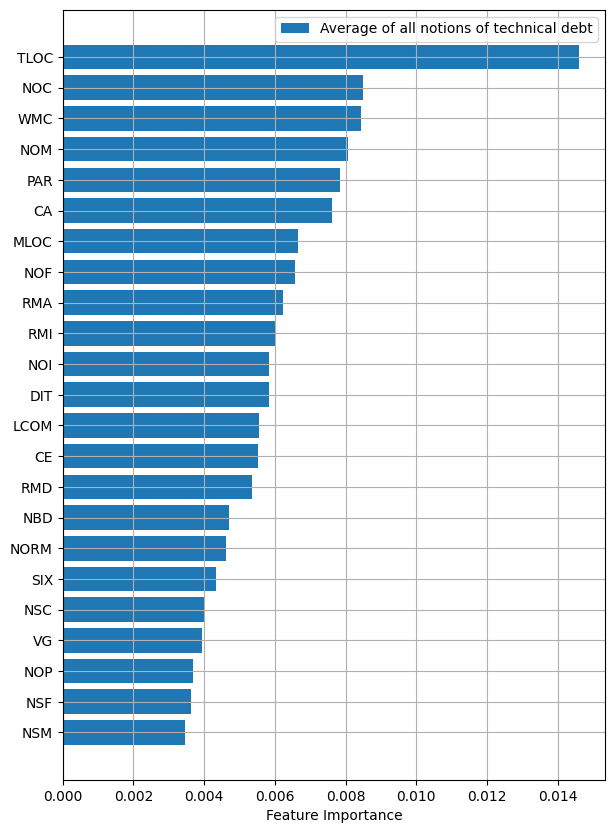

In [91]:
plt.figure(figsize=(7,10))
plt.grid()
plt.barh(list(avrg_fi_df["Metric"]), avrg_fi_df['Avg'], label = 'Average of all notions of technical debt')
plt.xlabel("Feature Importance")
plt.legend()

plt.savefig('f_Avg_FI.png')

In [66]:
df = SQ_metric_df.drop(SQ_metric_df[SQ_metric_df.Mean < 0.005].index)

In [67]:
df = df.sort_index()
df.shape

(91, 5)

In [68]:
df

Metric  SQ_Value  CO_Value  CC_Value      Mean
1        TLOC  0.012257  0.020123  0.011437  0.014606
5     LCOM_50  0.007848  0.006820  0.008166  0.007611
6     LCOM_60  0.008677  0.009254  0.011290  0.009740
7     LCOM_80  0.008111  0.013546  0.010676  0.010778
8     LCOM_99  0.004225  0.010004  0.007870  0.007366
9    LCOM_std  0.007985  0.006410  0.004518  0.006304
11     DIT_20  0.005868  0.003848  0.005980  0.005232
12     DIT_40  0.017193  0.006404  0.007689  0.010429
13     DIT_50  0.008850  0.007254  0.007817  0.007974
14     DIT_60  0.007269  0.006780  0.003571  0.005873
16     DIT_99  0.002936  0.008243  0.010208  0.007129
17    DIT_std  0.005054  0.004529  0.005846  0.005143
19      CE_20  0.005999  0.006457  0.004591  0.005682
22      CE_60  0.003443  0.005874  0.006449  0.005256
23      CE_80  0.019640  0.009161  0.006723  0.011841
24      CE_99  0.006115  0.006750  0.006192  0.006352
25     CE_std  0.002698  0.009599  0.006215  0.006171
27     RMI_20  0.006436  0.010460  0.011059  0.009318
28     RMI_40  0.018656  0.000914  0.003524  0.007698
32     RMI_99  0.009619  0.004217  0.003101  0.005646
33    RMI_std  0.015660  0.005568  0.006669  0.009299
35     NOM_20  0.003081  0.011044  0.008557  0.007561
36     NOM_40  0.018364  0.008786  0.007258  0.011469
38     NOM_60  0.019770  0.012880  0.011746  0.014799
40     NOM_99  0.007151  0.012177  0.014273  0.011200
41    NOM_std  0.008316  0.006343  0.004667  0.006442
49    NSF_std  0.003201  0.014091  0.015893  0.011062
56     NSM_99  0.006413  0.016204  0.016518  0.013045
57    NSM_std  0.015290  0.000900  0.002043  0.006078
62     NBD_60  0.005379  0.005570  0.004850  0.005267
63     NBD_80  0.004662  0.007583  0.007002  0.006416
64     NBD_99  0.010331  0.009328  0.015426  0.011695
65    NBD_std  0.012874  0.010423  0.010102  0.011133
71     SIX_80  0.003775  0.008473  0.009514  0.007254
72     SIX_99  0.006955  0.010018  0.006580  0.007851
73    SIX_std  0.016331  0.016437  0.012694  0.015154
74      CA_01  0.014858  0.003117  0.004506  0.007493
75      CA_20  0.003348  0.007908  0.009200  0.006819
76      CA_40  0.006888  0.002437  0.006411  0.005245
78      CA_60  0.010434  0.008184  0.010334  0.009651
80      CA_99  0.002732  0.026503  0.020918  0.016718
81     CA_std  0.002663  0.012762  0.007364  0.007597
82     NOI_01  0.002680  0.008804  0.010278  0.007254
84     NOI_40  0.004320  0.010685  0.011366  0.008790
85     NOI_50  0.014136  0.011303  0.011426  0.012288
88     NOI_99  0.009634  0.001297  0.006697  0.005876
91     PAR_20  0.008496  0.012384  0.016040  0.012307
93     PAR_50  0.008414  0.006613  0.004006  0.006344
94     PAR_60  0.003057  0.026040  0.029018  0.019372
96     PAR_99  0.007986  0.004665  0.007679  0.006777
97    PAR_std  0.013363  0.007384  0.008589  0.009778
99     WMC_20  0.005718  0.008582  0.009035  0.007778
100    WMC_40  0.012960  0.008032  0.014659  0.011884
101    WMC_50  0.005306  0.015186  0.016129  0.012207
102    WMC_60  0.010024  0.009304  0.005370  0.008233
104    WMC_99  0.007901  0.011289  0.011730  0.010307
105   WMC_std  0.016413  0.004913  0.006555  0.009294
109    NOC_50  0.008190  0.008180  0.010165  0.008845
110    NOC_60  0.003822  0.004192  0.011204  0.006406
111    NOC_80  0.012131  0.008676  0.009809  0.010205
112    NOC_99  0.005434  0.009665  0.009940  0.008346
113   NOC_std  0.003762  0.032630  0.032290  0.022894
114    RMA_01  0.005686  0.008721  0.007265  0.007224
116    RMA_40  0.004254  0.008522  0.005985  0.006254
117    RMA_50  0.004129  0.010357  0.009636  0.008041
118    RMA_60  0.004754  0.006285  0.006557  0.005865
119    RMA_80  0.003550  0.005859  0.008043  0.005817
120    RMA_99  0.012530  0.008246  0.004866  0.008547
126   NORM_60  0.001357  0.011273  0.012212  0.008281
127   NORM_80  0.012235  0.001668  0.003240  0.005714
128   NORM_99  0.003967  0.011727  0.010023  0.008573
129  NORM_std  0.015115  0.007985  0.005759  0.009620
132   MLOC_40  0.017468  0.003060  0.004716  0.008415
133   MLOC_

In [69]:
new_df = Qcc_quant[list(df['Metric'])]

In [70]:
new_df

TLOC  LCOM_50  LCOM_60  LCOM_80  LCOM_99  LCOM_std  DIT_20  DIT_40  \
0    127559.0    0.000   0.0000   0.6670  0.95881  0.349370     1.0     2.0   
1     47443.0    0.000   0.0000   0.5000  0.97942  0.315929     1.0     1.0   
2    110009.0    0.000   0.3330   0.6670  0.92600  0.332304     1.0     1.0   
3    105806.0    0.000   0.0000   0.0000  0.93164  0.259259     1.0     2.0   
4    501762.0    0.000   0.0000   0.6000  0.95890  0.326315     1.0     1.0   
5     24163.0    0.000   0.0000   0.5000  0.88000  0.306648     1.0     1.0   
6    495532.0    0.000   0.0000   0.0000  0.92597  0.268863     1.0     1.0   
7    194715.0    0.000   0.0000   0.5000  0.93800  0.289172     1.0     1.0   
8    219681.0    0.000   0.0000   0.6670  0.93804  0.347795     1.0     1.0   
9    198176.0    0.000   0.0000   0.0000  0.93848  0.273629     1.0     2.0   
10    36641.0    0.000   0.0000   0.3330  0.93310  0.284337     1.0     2.0   
11    54555.0    0.000   0.0000   0.6526  1.16875  0.360938     1.0     1.0   
12    55398.0    0.000   0.0000   0.1070  0.91700  0.234703     1.0     2.0   
13    35919.0    0.000   0.0000   0.0000  0.88109  0.203363     1.0     1.0   
14    71905.0    0.000   0.0000   0.5000  0.93192  0.308026     1.0     2.0   
15   400516.0    0.000   0.0000   0.7164  1.74604  0.472729     2.0     2.0   
16    95527.0    0.000   0.0000   0.6000  0.94020  0.321507     1.0     2.0   
17   651118.0    0.000   0.0000   0.5192  0.95871  0.314019     1.0     1.0   
18    20498.0    0.000   0.0000   0.0000  0.93825  0.258322     1.0     2.0   
19    27674.0    0.000   0.0000   0.6392  1.00000  0.329398     1.0     2.0   
20    89477.0    0.000   0.0000   0.0000  0.89620  0.214138     1.0     1.0   
21    23109.0    0.000   0.0000   0.5000  0.91020  0.284180     1.0     1.0   
22    96038.0    0.000   0.0000   0.5000  0.93000  0.308636     1.0     1.0   
23   110782.0    0.000   0.0000   0.5000  0.96800  0.312921     1.0     1.0   
24     3457.0    0.000   0.0000   0.5000  1.01590  0.335772     1.0     2.0   
25    46588.0    0.000   0.0000   0.0000  0.91408  0.251629     1.0     1.0   
26   106412.0    0.000   0.0000   0.4000  0.93725  0.290718     1.0     2.0   
27    22645.0    0.750   0.9030   1.0000  1.00000  0.446491     1.0     1.0   
28    52757.0    0.000   0.0000   0.5000  0.93432  0.295441     1.0     1.0   
29    61137.0    0.000   0.0000   0.6670  0.95728  0.336210     1.0     2.0   
30    48615.0    0.000   0.0000   0.5500  1.00000  0.328674     1.0     1.0   
31   876486.0    0.000   0.0000   0.1316  0.92358  0.265102     1.0     1.0   
32   319868.0    0.000   0.0000   0.5000  1.00000  0.303044     1.0     1.0   
33    64916.0    0.000   0.0000   0.5000  0.93635  0.302036     1.0     2.0   
34   431693.0    0.000   0.0000   0.6670  0.96880  0.340108     1.0     1.0   
35   149722.0    0.000   0.4024   0.7500  1.00000  0.368688     1.0     1.0   
36   100760.0    0.000   0.0000   0.0000  0.93425  0.238374     1.0     2.0   
37    13874.0    0.000   0.0000   0.6670  0.97152  0.348322     0.0     1.0   
38   218032.0    0.000   0.0000   0.3666  0.94200  0.297750     1.0     1.0   
39    78348.0    0.000   0.0666   0.6670  0.96842  0.353131     1.0     1.0   
40    24716.0    0.000   0.4402   0.8000  0.95404  0.383573     1.0     1.0   
41    15699.0    0.000   0.0000   0.6000  0.91980  0.332304     1.0     1.0   
42    42767.0    0.000   0.0000   0.5000  0.93392  0.308822     1.0     1.0   
43     5728.0    0.000   0.0000   0.0000  0.85453  0.219162     1.0     1.0   
44   169821.0    0.000   0.0000   0.6670  1.05600  0.352194     1.0     1.0   
45    18287.0    0.000   0.0000   0.4736  1.62500  0.423707     1.0     1.0   
46   524942.0    0.000   0.0000   0.3330  0.96000  0.285184     1.0     1.0   
47   212803.0    0.000   0.0000   0.0000  0.90600  0.251092     1.0     1.0   
48   109515.0    0.000   0.0000   0.5000  0.94654  0.301663     1.0     1.0   
49    65774.0    0.000   0.0000   0.0000  0.95426  0.259764

In [71]:
new_df.insert(loc=0, column='Project', value=Qcc_quant['Project'])
new_df.insert(loc=1, column='Domain', value=Qcc_quant['Domain'])

In [72]:
new_df

Project                                Domain      TLOC  LCOM_50  \
0    ant-1.8               parsers/generators/make  127559.0    0.000   
1    antlr-3               parsers/generators/make   47443.0    0.000   
2    aoi-2.8                     3D/graphics/media  110009.0    0.000   
3    argouml  diagram generator/data visualization  105806.0    0.000   
4    aspectj                  programming language  501762.0    0.000   
5    axion-1                              database   24163.0    0.000   
6    azureus                              database  495532.0    0.000   
7    batik-1                     3D/graphics/media  194715.0    0.000   
8    castor-                            middleware  219681.0    0.000   
9    cayenne                              database  198176.0    0.000   
10   checkst                                   IDE   36641.0    0.000   
11   cobertu                               testing   54555.0    0.000   
12   collect                                  tool   55398.0    0.000   
13   colt-1.                                   SDK   35919.0    0.000   
14   columba                                  tool   71905.0    0.000   
15   compier                                  tool  400516.0    0.000   
16   c_jdbc-                              database   95527.0    0.000   
17   derby-1                              database  651118.0    0.000   
18   display  diagram generator/data visualization   20498.0    0.000   
19   drawswf                     3D/graphics/media   27674.0    0.000   
20   drjava-                                   IDE   89477.0    0.000   
21   emma-2.                               testing   23109.0    0.000   
22   exoport  diagram generator/data visualization   96038.0    0.000   
23   findbug                               testing  110782.0    0.000   
24   fitjava                               testing    3457.0    0.000   
25   fitlibr                               testing   46588.0    0.000   
26   freecol                                 games  106412.0    0.000   
27   freecs-                                  tool   22645.0    0.750   
28   freemin  diagram generator/data visualization   52757.0    0.000   
29   galleon                     3D/graphics/media   61137.0    0.000   
30   ganttpr                                  tool   48615.0    0.000   
31   geotool                                   SDK  876486.0    0.000   
32   hadoop-                            middleware  319868.0    0.000   
33   heritri                                  tool   64916.0    0.000   
34   hiberna                              database  431693.0    0.000   
35   hsqldb-                              database  149722.0    0.000   
36   htmluni                               testing  100760.0    0.000   
37   informa                            middleware   13874.0    0.000   
38   iReport  diagram generator/data visualization  218032.0    0.000   
39   itext-5  diagram generator/data visualization   78348.0    0.000   
40   ivatagr                            middleware   24716.0    0.000   
41   jag-6.1                                  tool   15699.0    0.000   
42   james-2                                  tool   42767.0    0.000   
43   jasml-0                                  tool    5728.0    0.000   
44   jasperr  diagram generator/data visualization  169821.0    0.000   
45   javacc-               parsers/generators/make   18287.0    0.000   
46   jboss-5                            middleware  524942.0    0.000   
47   jchempa                                   SDK  212803.0    0.000   
48   jedit-4                                  tool  109515.0    0.000   
49   jena-2.                            middleware   65774.0    0.000   
50   jext-5.  diagram generator/data visualization   60160.0    0.000   
51   jFin_Da                                   SDK    8903.0    0.000   
52   jfreech                                  tool  143062.0    0.000   
53   jgraph-                                  tool   31818.0   

In [73]:
new_df.to_csv('Qcc_quant_after_FI.csv',index=False)

In [74]:
print(new_df.columns)

Index(['Project', 'Domain', 'TLOC', 'LCOM_50', 'LCOM_60', 'LCOM_80', 'LCOM_99',
       'LCOM_std', 'DIT_20', 'DIT_40', 'DIT_50', 'DIT_60', 'DIT_99', 'DIT_std',
       'CE_20', 'CE_60', 'CE_80', 'CE_99', 'CE_std', 'RMI_20', 'RMI_40',
       'RMI_99', 'RMI_std', 'NOM_20', 'NOM_40', 'NOM_60', 'NOM_99', 'NOM_std',
       'NSF_std', 'NSM_99', 'NSM_std', 'NBD_60', 'NBD_80', 'NBD_99', 'NBD_std',
       'SIX_80', 'SIX_99', 'SIX_std', 'CA_01', 'CA_20', 'CA_40', 'CA_60',
       'CA_99', 'CA_std', 'NOI_01', 'NOI_40', 'NOI_50', 'NOI_99', 'PAR_20',
       'PAR_50', 'PAR_60', 'PAR_99', 'PAR_std', 'WMC_20', 'WMC_40', 'WMC_50',
       'WMC_60', 'WMC_99', 'WMC_std', 'NOC_50', 'NOC_60', 'NOC_80', 'NOC_99',
       'NOC_std', 'RMA_01', 'RMA_40', 'RMA_50', 'RMA_60', 'RMA_80', 'RMA_99',
       'NORM_60', 'NORM_80', 'NORM_99', 'NORM_std', 'MLOC_40', 'MLOC_50',
       'MLOC_60', 'MLOC_99', 'NSC_99', 'NSC_std', 'RMD_20', 'RMD_40', 'RMD_60',
       'RMD_std', 'NOF_20', 'NOF_40', 'NOF_50', 'NOF_60', 'NOF_80', 'N

In [75]:
col = []
for i in range (len(list(df['Metric']))):
    col.append(list(df['Metric'])[i][:3])

In [76]:
col

['TLO',
 'LCO',
 'LCO',
 'LCO',
 'LCO',
 'LCO',
 'DIT',
 'DIT',
 'DIT',
 'DIT',
 'DIT',
 'DIT',
 'CE_',
 'CE_',
 'CE_',
 'CE_',
 'CE_',
 'RMI',
 'RMI',
 'RMI',
 'RMI',
 'NOM',
 'NOM',
 'NOM',
 'NOM',
 'NOM',
 'NSF',
 'NSM',
 'NSM',
 'NBD',
 'NBD',
 'NBD',
 'NBD',
 'SIX',
 'SIX',
 'SIX',
 'CA_',
 'CA_',
 'CA_',
 'CA_',
 'CA_',
 'CA_',
 'NOI',
 'NOI',
 'NOI',
 'NOI',
 'PAR',
 'PAR',
 'PAR',
 'PAR',
 'PAR',
 'WMC',
 'WMC',
 'WMC',
 'WMC',
 'WMC',
 'WMC',
 'NOC',
 'NOC',
 'NOC',
 'NOC',
 'NOC',
 'RMA',
 'RMA',
 'RMA',
 'RMA',
 'RMA',
 'RMA',
 'NOR',
 'NOR',
 'NOR',
 'NOR',
 'MLO',
 'MLO',
 'MLO',
 'MLO',
 'NSC',
 'NSC',
 'RMD',
 'RMD',
 'RMD',
 'RMD',
 'NOF',
 'NOF',
 'NOF',
 'NOF',
 'NOF',
 'NOF',
 'VG_',
 'VG_',
 'VG_']

In [77]:
x = pd.Series(col)

In [78]:
col = x.unique()
df2 = pd.DataFrame()
for i in range (len(col)):
    df3 = (Qcc_quant.filter(regex=col[i]))
    df2 = pd.concat([df2, df3], axis=1)
df2
df2.insert(loc=0, column='Project', value=Qcc_quant['Project'])
df2.insert(loc=1, column='Domain', value=Qcc_quant['Domain'])
df2.to_csv('TEST_FI.csv',index=False)